# TODOs
- [ ] Filter out preseason/playoff games?
- [x] Get betting odds 
  - [x] Calculate winnings with naive betting strategy
  - [ ] Model out over/under
- [ ] Examine different model types

In [2]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt


In [3]:
games = pd.read_csv('data/games.csv')

In [4]:
games_details = pd.read_csv('data/games_details.csv')


/var/folders/mn/9mbt16qj52sdhm9wxkl4yy440000gr/T/ipykernel_98390/2521359903.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('data/games_details.csv')


In [5]:
players = pd.read_csv('data/players.csv')

In [6]:
teams = pd.read_csv('data/teams.csv')


In [7]:
ranking = pd.read_csv('data/ranking.csv')

In [8]:
games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735392 entries, 0 to 735391
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            735392 non-null  int64  
 1   TEAM_ID            735392 non-null  int64  
 2   TEAM_ABBREVIATION  735392 non-null  object 
 3   TEAM_CITY          735392 non-null  object 
 4   PLAYER_ID          735392 non-null  int64  
 5   PLAYER_NAME        735392 non-null  object 
 6   NICKNAME           119801 non-null  object 
 7   START_POSITION     280585 non-null  object 
 8   COMMENT            122738 non-null  object 
 9   MIN                612651 non-null  object 
 10  FGM                612651 non-null  float64
 11  FGA                612651 non-null  float64
 12  FG_PCT             612651 non-null  float64
 13  FG3M               612651 non-null  float64
 14  FG3A               612651 non-null  float64
 15  FG3_PCT            612651 non-null  float64
 16  FT

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29133 entries, 0 to 29132
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     29133 non-null  object 
 1   GAME_ID           29133 non-null  int64  
 2   GAME_STATUS_TEXT  29133 non-null  object 
 3   HOME_TEAM_ID      29133 non-null  int64  
 4   VISITOR_TEAM_ID   29133 non-null  int64  
 5   SEASON            29133 non-null  int64  
 6   TEAM_ID_home      29133 non-null  int64  
 7   PTS_home          29034 non-null  float64
 8   FG_PCT_home       29034 non-null  float64
 9   FT_PCT_home       29034 non-null  float64
 10  FG3_PCT_home      29034 non-null  float64
 11  AST_home          29034 non-null  float64
 12  REB_home          29034 non-null  float64
 13  TEAM_ID_away      29133 non-null  int64  
 14  PTS_away          29034 non-null  float64
 15  FG_PCT_away       29034 non-null  float64
 16  FT_PCT_away       29034 non-null  float6

In [10]:
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2024-11-15,22400009,Final,1610612754,1610612748,2024,1610612754,111.0,0.512,0.818,...,28.0,39.0,1610612748,124.0,0.517,0.826,0.357,27.0,36.0,0
1,2024-11-15,22400010,Final,1610612753,1610612755,2024,1610612753,98.0,0.436,0.864,...,15.0,43.0,1610612755,86.0,0.403,0.857,0.323,19.0,34.0,1
2,2024-11-15,22400011,Final,1610612761,1610612765,2024,1610612761,95.0,0.361,0.773,...,21.0,53.0,1610612765,99.0,0.411,0.650,0.211,24.0,56.0,0
3,2024-11-15,22400012,Final,1610612737,1610612764,2024,1610612737,129.0,0.469,0.833,...,28.0,55.0,1610612764,117.0,0.406,0.762,0.349,28.0,52.0,1
4,2024-11-15,22400013,Final,1610612739,1610612741,2024,1610612739,144.0,0.548,0.875,...,33.0,40.0,1610612741,126.0,0.511,0.800,0.476,32.0,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29128,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
29129,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
29130,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
29131,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


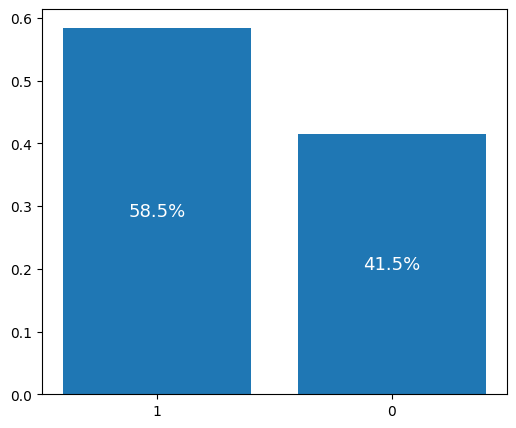

In [11]:
fig, ax = plt.subplots(figsize=(6,5))

v_c = games['HOME_TEAM_WINS'].value_counts(normalize=True)
v_c.index = v_c.index.astype(str)

ax.bar(v_c.index, v_c.values)

for i in ax.patches:
    x, y = i.get_x(), i.get_y()
    w, h = i.get_width(), i.get_height()

    val = str(round(h*100,1)) + '%'

    ax.text(x + w/2, y + h/2, val,
            horizontalalignment='center', verticalalignment='center',
            fontsize=13, color='white')

plt.show()

Baseline is 58.5% of games, the home team wins.

# Examining the standings

Going to look at current record, home and away records on the day of the games

In [12]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN


In [13]:
def calculate_win_pct(record: str):
    w,l = record.split("-")
    w = int(w)
    l = int(l)
    if w+l ==0:
        return 0
    return w / (w+l)

def format_rankings(r):
    r["HOME_WIN_PCT"] = r["HOME_RECORD"].apply(calculate_win_pct)
    r["AWAY_WIN_PCT"] = r["ROAD_RECORD"].apply(calculate_win_pct)

format_rankings(ranking)
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN,0.875000,0.800000
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN,0.800000,0.857143
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN,0.750000,0.600000
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN,0.833333,0.571429
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN,1.000000,0.333333


# Build Game Features

Initial proposed game features:

* game_date
* home_team_id
* away_team_id
* home_team_record
* away_team_record
* home_team_home_record
* away_team_away_record


In [14]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2024-11-15,22400009,Final,1610612754,1610612748,2024,1610612754,111.0,0.512,0.818,...,28.0,39.0,1610612748,124.0,0.517,0.826,0.357,27.0,36.0,0
1,2024-11-15,22400010,Final,1610612753,1610612755,2024,1610612753,98.0,0.436,0.864,...,15.0,43.0,1610612755,86.0,0.403,0.857,0.323,19.0,34.0,1
2,2024-11-15,22400011,Final,1610612761,1610612765,2024,1610612761,95.0,0.361,0.773,...,21.0,53.0,1610612765,99.0,0.411,0.650,0.211,24.0,56.0,0
3,2024-11-15,22400012,Final,1610612737,1610612764,2024,1610612737,129.0,0.469,0.833,...,28.0,55.0,1610612764,117.0,0.406,0.762,0.349,28.0,52.0,1
4,2024-11-15,22400013,Final,1610612739,1610612741,2024,1610612739,144.0,0.548,0.875,...,33.0,40.0,1610612741,126.0,0.511,0.800,0.476,32.0,36.0,1


In [15]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN,0.875000,0.800000
1,1610612744,0,22024,2024-11-15,West,Golden State,12,10,2,0.833,4-1,6-1,NaN,0.800000,0.857143
2,1610612745,0,22024,2024-11-15,West,Houston,13,9,4,0.692,6-2,3-2,NaN,0.750000,0.600000
3,1610612756,0,22024,2024-11-15,West,Phoenix,13,9,4,0.692,5-1,4-3,NaN,0.833333,0.571429
4,1610612747,0,22024,2024-11-15,West,L.A. Lakers,12,8,4,0.667,6-0,2-4,NaN,1.000000,0.333333


In [16]:
ranking = ranking.sort_values(by='STANDINGSDATE')
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
202376,1610612739,0,22002,2003-10-01,East,Cleveland,82,17,65,0.207,14-27,3-38,NaN,0.341463,0.073171
113769,1610612763,0,22002,2003-10-01,West,Memphis,82,28,54,0.341,20-21,8-33,NaN,0.487805,0.195122
113768,1610612744,0,22002,2003-10-01,West,Golden State,82,38,44,0.463,24-17,14-27,NaN,0.585366,0.341463
113767,1610612760,0,22002,2003-10-01,West,Seattle,82,40,42,0.488,25-16,15-26,NaN,0.609756,0.365854
113766,1610612745,0,22002,2003-10-01,West,Houston,82,43,39,0.524,28-13,15-26,NaN,0.682927,0.365854


In [17]:
ranking.tail()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,HOME_WIN_PCT,AWAY_WIN_PCT
10414,1610612737,0,22024,2024-11-15,East,Atlanta,13,6,7,0.462,4-4,2-3,NaN,0.500,0.400000
10413,1610612752,0,22024,2024-11-15,East,New York,12,6,6,0.500,3-2,3-4,NaN,0.600,0.428571
10412,1610612753,0,22024,2024-11-15,East,Orlando,14,8,6,0.571,7-0,1-6,NaN,1.000,0.142857
10410,1610612739,0,22024,2024-11-15,East,Cleveland,14,14,0,1.000,7-0,7-0,NaN,1.000,1.000000
0,1610612760,0,22024,2024-11-15,West,Oklahoma City,13,11,2,0.846,7-1,4-1,NaN,0.875,0.800000


In [18]:
def get_b2bs(game, _model_data):
    date = game['GAME_DATETIME_OBJ'] - pd.Timedelta(days=1)
    home_team = game['HOME_TEAM_ID']
    away_team = game['VISITOR_TEAM_ID']
    home_b2b = len(_model_data.loc[(_model_data['GAME_DATETIME_OBJ'] == date) & ((_model_data['HOME_TEAM_ID'] == home_team) | (_model_data['VISITOR_TEAM_ID'] == home_team))])
    away_b2b = len(_model_data.loc[(_model_data['GAME_DATETIME_OBJ'] == date) & ((_model_data['HOME_TEAM_ID'] == away_team) | (_model_data['VISITOR_TEAM_ID'] == away_team))])
    return pd.Series([bool(home_b2b), bool(away_b2b)])

def prepare_games(games):
    _games = games.copy()
    model_data = _games.loc[:, ["GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "SEASON", "HOME_TEAM_WINS"]]
    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))
    model_data[["HOME_TEAM_B2B","AWAY_TEAM_B2B"]] = model_data.apply(lambda game: get_b2bs(game, model_data), axis=1)
    return model_data[["SEASON", "GAME_DATETIME", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "W_PCT_HOME", "HOME_WIN_PCT_HOME", "W_PCT_VISITOR", "AWAY_WIN_PCT_VISITOR", "HOME_TEAM_WINS", "HOME_TEAM_B2B","AWAY_TEAM_B2B"]]



In [19]:
prepared_games = prepare_games(games)

In [20]:
prepared_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29153 entries, 0 to 29152
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                29153 non-null  int64  
 1   GAME_DATETIME         29153 non-null  int64  
 2   HOME_TEAM_ID          29153 non-null  int64  
 3   VISITOR_TEAM_ID       29153 non-null  int64  
 4   W_PCT_HOME            29153 non-null  float64
 5   HOME_WIN_PCT_HOME     29153 non-null  float64
 6   W_PCT_VISITOR         29153 non-null  float64
 7   AWAY_WIN_PCT_VISITOR  29153 non-null  float64
 8   HOME_TEAM_WINS        29153 non-null  int64  
 9   HOME_TEAM_B2B         29153 non-null  bool   
 10  AWAY_TEAM_B2B         29153 non-null  bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 2.1 MB


In [21]:
prepared_games.head()

,SEASON,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_WINS,HOME_TEAM_B2B,AWAY_TEAM_B2B
0,2024,1731628800000000000,1610612754,1610612748,0.417,0.600000,0.455,0.500000,0,False,False
1,2024,1731628800000000000,1610612753,1610612755,0.571,1.000000,0.167,0.166667,1,False,False
2,2024,1731628800000000000,1610612761,1610612765,0.154,0.333333,0.429,0.428571,0,False,False
3,2024,1731628800000000000,1610612737,1610612764,0.462,0.500000,0.182,0.166667,1,False,False
4,2024,1731628800000000000,1610612739,1610612741,1.000,1.000000,0.385,0.500000,1,False,False


In [22]:
prepared_games.to_csv('data/prepared_games.csv', index=False)

# Correlation between fields

If fields are highly correlated, may not make sense to include both in the model (they in theory will have the same contribution)

In [23]:
feat_cols = [
    "GAME_DATETIME",
    "HOME_TEAM_ID",
    "VISITOR_TEAM_ID",
    "W_PCT_HOME",
    "HOME_WIN_PCT_HOME",
    "W_PCT_VISITOR",
    "AWAY_WIN_PCT_VISITOR",
    "HOME_TEAM_B2B",
    "AWAY_TEAM_B2B"
]
target = 'HOME_TEAM_WINS'

In [24]:
corr = prepared_games[feat_cols + [target]].corr()

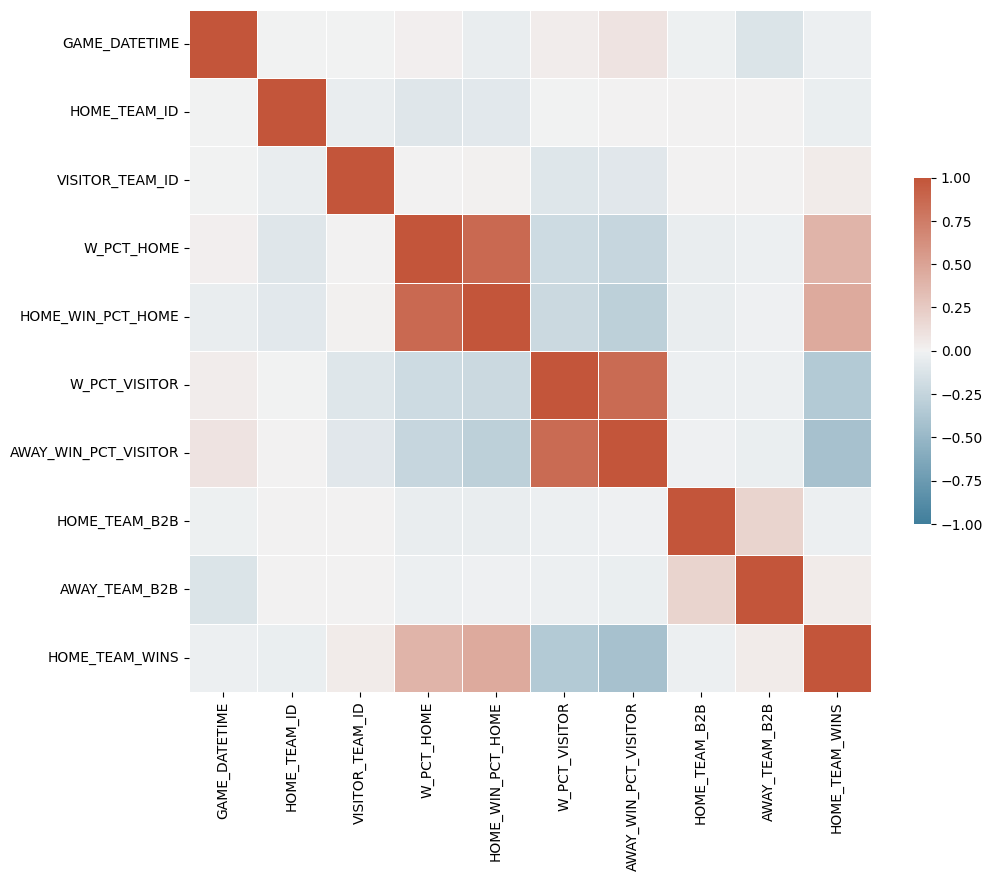

In [25]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0, vmin=-1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

There is some correlation between the home/away records and the team's total record, but hopefully there is enough of a difference with how correlated they are. I *think* this is right - need to research more

# Training
2020 - 2023

In [26]:
# from sklearn.model_selection import train_test_split
# X = prepared_games.drop([target, ], axis=1)  # Features
# y = prepared_games[target]  # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# using temporal data instead of random selected data


In [27]:
train = prepared_games.loc[(prepared_games['SEASON'] >= 2007) & (prepared_games['SEASON'] <= 2018)]

X_train, y_train = train[feat_cols], train[target]

test = prepared_games.loc[(prepared_games['SEASON'] == 2023)]
X_test, y_test = test[feat_cols], test[target]

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [29]:
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=2, random_state=42)

In [30]:
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Train accuracy: 0.770983645983646
Test accuracy: 0.754880694143167


In [31]:
X_train.head()

,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_B2B,AWAY_TEAM_B2B
6560,1402790400000000000,1610612759,1610612748,0.756,0.780488,0.659,0.536585,False,False
6561,1402531200000000000,1610612748,1610612759,0.659,0.780488,0.756,0.731707,False,False
6562,1402358400000000000,1610612748,1610612759,0.659,0.780488,0.756,0.731707,False,False
6563,1402185600000000000,1610612759,1610612748,0.756,0.780488,0.659,0.536585,False,False
6564,1401926400000000000,1610612759,1610612748,0.756,0.780488,0.659,0.536585,False,False


In [32]:
lr = LogisticRegression(random_state=42, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [33]:
print('Train accuracy:',lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

Train accuracy: 0.5941558441558441
Test accuracy: 0.549530007230658


In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

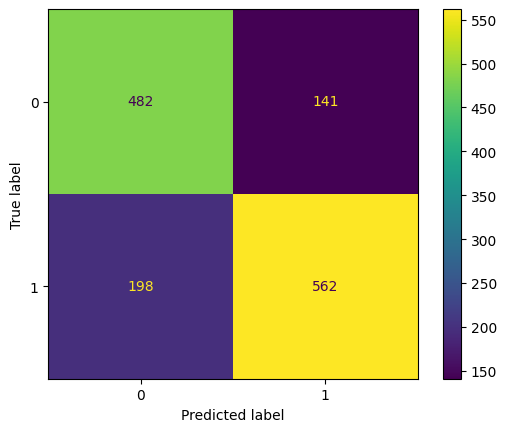

In [35]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

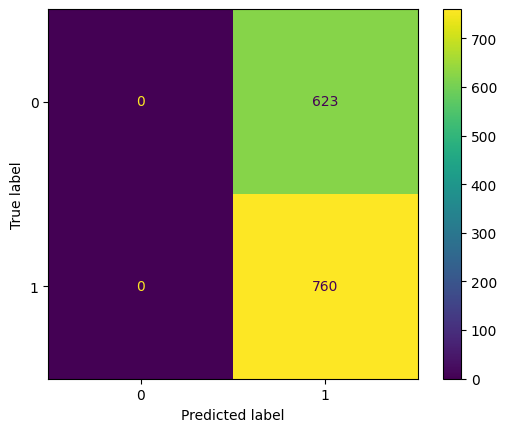

In [36]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

# Testing Results in a single season
Going to take the first half of the season (60%, 70%, etc), and see if model predictions hold. I think this will present a more realistic use case, because so much changes over the offseason. Let the first half of the season, happen, then use the first half data to predict second half results.

In [37]:
season_2023 = prepared_games.loc[(prepared_games['SEASON'] == 2023)].sort_values(by="GAME_DATETIME")

In [38]:
season_2023.head()

,SEASON,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_WINS,HOME_TEAM_B2B,AWAY_TEAM_B2B
1639,2023,1696464000000000000,1610612750,1610612742,1.0,1.0,0.0,0.0,1,False,False
1638,2023,1696636800000000000,1610612744,1610612747,1.0,1.0,0.0,0.0,1,False,False
1637,2023,1696636800000000000,1610612742,1610612750,0.0,0.0,1.0,1.0,0,False,False
1636,2023,1696723200000000000,1610612746,1610612762,0.0,0.0,1.0,1.0,0,False,False
1635,2023,1696723200000000000,1610612761,1610612758,1.0,1.0,0.0,0.0,1,False,False


In [39]:
season_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383 entries, 1639 to 257
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                1383 non-null   int64  
 1   GAME_DATETIME         1383 non-null   int64  
 2   HOME_TEAM_ID          1383 non-null   int64  
 3   VISITOR_TEAM_ID       1383 non-null   int64  
 4   W_PCT_HOME            1383 non-null   float64
 5   HOME_WIN_PCT_HOME     1383 non-null   float64
 6   W_PCT_VISITOR         1383 non-null   float64
 7   AWAY_WIN_PCT_VISITOR  1383 non-null   float64
 8   HOME_TEAM_WINS        1383 non-null   int64  
 9   HOME_TEAM_B2B         1383 non-null   bool   
 10  AWAY_TEAM_B2B         1383 non-null   bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 110.7 KB


In [40]:
train_1, train_2, test = np.array_split(season_2023, 3)
train = pd.concat([train_1, train_2])
X_train, y_train = train[feat_cols], train[target]

X_test, y_test = test[feat_cols], test[target]

/Users/derek.gliwa/personal_dev/nba-data-scrapping/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 1639 to 718
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                922 non-null    int64  
 1   GAME_DATETIME         922 non-null    int64  
 2   HOME_TEAM_ID          922 non-null    int64  
 3   VISITOR_TEAM_ID       922 non-null    int64  
 4   W_PCT_HOME            922 non-null    float64
 5   HOME_WIN_PCT_HOME     922 non-null    float64
 6   W_PCT_VISITOR         922 non-null    float64
 7   AWAY_WIN_PCT_VISITOR  922 non-null    float64
 8   HOME_TEAM_WINS        922 non-null    int64  
 9   HOME_TEAM_B2B         922 non-null    bool   
 10  AWAY_TEAM_B2B         922 non-null    bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 73.8 KB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461 entries, 717 to 257
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEASON                461 non-null    int64  
 1   GAME_DATETIME         461 non-null    int64  
 2   HOME_TEAM_ID          461 non-null    int64  
 3   VISITOR_TEAM_ID       461 non-null    int64  
 4   W_PCT_HOME            461 non-null    float64
 5   HOME_WIN_PCT_HOME     461 non-null    float64
 6   W_PCT_VISITOR         461 non-null    float64
 7   AWAY_WIN_PCT_VISITOR  461 non-null    float64
 8   HOME_TEAM_WINS        461 non-null    int64  
 9   HOME_TEAM_B2B         461 non-null    bool   
 10  AWAY_TEAM_B2B         461 non-null    bool   
dtypes: bool(2), float64(4), int64(5)
memory usage: 36.9 KB


In [43]:
test["GAME_DATETIME"].describe()

count    4.610000e+02
mean     1.711783e+18
std      1.965111e+15
min      1.708906e+18
25%      1.710202e+18
50%      1.711498e+18
75%      1.712880e+18
max      1.718582e+18
Name: GAME_DATETIME, dtype: float64

In [44]:
train["GAME_DATETIME"].describe()

count    9.220000e+02
mean     1.702912e+18
std      3.321823e+15
min      1.696464e+18
25%      1.700114e+18
50%      1.703030e+18
75%      1.705709e+18
max      1.708906e+18
Name: GAME_DATETIME, dtype: float64

In [45]:
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=2, random_state=42)

In [46]:
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Train accuracy: 0.89587852494577
Test accuracy: 0.6507592190889371


# Comparing results across all seasons

In [47]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2024-11-15,22400009,Final,1610612754,1610612748,2024,1610612754,111.0,0.512,0.818,...,28.0,39.0,1610612748,124.0,0.517,0.826,0.357,27.0,36.0,0
1,2024-11-15,22400010,Final,1610612753,1610612755,2024,1610612753,98.0,0.436,0.864,...,15.0,43.0,1610612755,86.0,0.403,0.857,0.323,19.0,34.0,1
2,2024-11-15,22400011,Final,1610612761,1610612765,2024,1610612761,95.0,0.361,0.773,...,21.0,53.0,1610612765,99.0,0.411,0.650,0.211,24.0,56.0,0
3,2024-11-15,22400012,Final,1610612737,1610612764,2024,1610612737,129.0,0.469,0.833,...,28.0,55.0,1610612764,117.0,0.406,0.762,0.349,28.0,52.0,1
4,2024-11-15,22400013,Final,1610612739,1610612741,2024,1610612739,144.0,0.548,0.875,...,33.0,40.0,1610612741,126.0,0.511,0.800,0.476,32.0,36.0,1


In [48]:
games["SEASON"].min()

np.int64(2003)

In [49]:
def calculate_season(s):
    season = prepared_games.loc[(prepared_games['SEASON'] == s)].sort_values(by="GAME_DATETIME")
    train_1, test = np.array_split(season, 2)
    train = pd.concat([train_1])
    X_train, y_train = train[feat_cols], train[target]

    X_test, y_test = test[feat_cols], test[target]
    clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=100, max_depth=7, bootstrap=True)
    clf.fit(X_train, y_train)
    print('Train accuracy:',clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    # importances = clf.feature_importances_
    # plt.figure(figsize=(8, 4))
    # plt.barh(feat_cols, importances, color='skyblue')
    # plt.xlabel('Gini Importance')
    # plt.title('Feature Importance - Gini Importance')
    # plt.gca().invert_yaxis()  # Invert y-axis for better visualization
    # plt.show()

In [50]:
import warnings
warnings.filterwarnings('ignore')
for s in range(2003, 2024):
    print("******* CALCULATING SEASON **********")
    print(s)
    calculate_season(s)

******* CALCULATING SEASON **********
2003
Train accuracy: 0.9033189033189033
Test accuracy: 0.6763005780346821
******* CALCULATING SEASON **********
2004
Train accuracy: 0.9045521292217328
Test accuracy: 0.6960352422907489
******* CALCULATING SEASON **********
2005
Train accuracy: 0.8994413407821229
Test accuracy: 0.7039106145251397
******* CALCULATING SEASON **********
2006
Train accuracy: 0.9014084507042254
Test accuracy: 0.6643159379407616
******* CALCULATING SEASON **********
2007
Train accuracy: 0.9107648725212465
Test accuracy: 0.7148936170212766
******* CALCULATING SEASON **********
2008
Train accuracy: 0.9186535764375876
Test accuracy: 0.7205056179775281
******* CALCULATING SEASON **********
2009
Train accuracy: 0.9157303370786517
Test accuracy: 0.6924157303370787
******* CALCULATING SEASON **********
2010
Train accuracy: 0.9127988748241913
Test accuracy: 0.7060478199718706
******* CALCULATING SEASON **********
2011
Train accuracy: 0.9438405797101449
Test accuracy: 0.686594202

# Maybe look at recent performance (last 10, 20, etc)

In [51]:
games.sample(10)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
26828,2016-02-09,21500784,Final,1610612748,1610612759,2015,1610612748,101.0,0.571,0.708,...,21.0,31.0,1610612759,119.0,0.528,0.731,0.429,25.0,43.0,0
27507,2015-11-10,21500110,Final,1610612749,1610612738,2015,1610612749,83.0,0.411,0.739,...,14.0,41.0,1610612738,99.0,0.442,0.842,0.233,21.0,45.0,0
10198,2012-01-25,21100263,Final,1610612760,1610612740,2011,1610612760,101.0,0.531,0.848,...,21.0,31.0,1610612740,91.0,0.467,0.952,0.143,16.0,32.0,1
13285,2009-10-14,10900061,Final,1610612759,1610612746,2009,1610612759,90.0,0.443,0.700,...,26.0,44.0,1610612746,93.0,0.513,0.643,0.400,23.0,37.0,0
24301,2017-12-29,21700527,Final,1610612758,1610612756,2017,1610612758,101.0,0.463,0.826,...,23.0,37.0,1610612756,111.0,0.482,0.667,0.433,26.0,47.0,0
9350,2012-10-15,11200049,Final,1610612743,1610612744,2012,1610612743,104.0,0.398,0.735,...,23.0,52.0,1610612744,98.0,0.481,0.591,0.550,17.0,41.0,1
12967,2009-12-01,20900253,Final,1610612766,1610612738,2009,1610612766,90.0,0.405,0.686,...,13.0,34.0,1610612738,108.0,0.545,0.897,0.588,24.0,38.0,0
7418,2013-12-28,21300441,Final,1610612741,1610612742,2013,1610612741,83.0,0.432,0.842,...,22.0,34.0,1610612742,105.0,0.526,0.909,0.500,26.0,39.0,0
11061,2011-02-04,21000734,Final,1610612754,1610612757,2010,1610612754,100.0,0.403,0.767,...,12.0,58.0,1610612757,87.0,0.364,0.818,0.250,17.0,39.0,1
11698,2010-11-09,21000103,Final,1610612748,1610612762,2010,1610612748,114.0,0.439,0.766,...,21.0,46.0,1610612762,116.0,0.484,0.857,0.421,30.0,44.0,0


In [52]:
teams.sample(5)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
13,0,1610612752,1946,2019,NYK,Knicks,1946,New York,Madison Square Garden,19763.0,Cablevision (James Dolan),Steve Mills,David Fizdale,Westchester Knicks
16,0,1610612755,1949,2019,PHI,76ers,1949,Philadelphia,Wells Fargo Center,NaN,Joshua Harris,Elton Brand,Brett Brown,Delaware Blue Coats
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
12,0,1610612751,1976,2019,BKN,Nets,1976,Brooklyn,Barclays Center,NaN,Joe Tsai,Sean Marks,Kenny Atkinson,Long Island Nets
22,0,1610612761,1995,2019,TOR,Raptors,1995,Toronto,Scotiabank Arena,19800.0,Maple Leaf Sports and Entertainment,Masai Ujiri,Nick Nurse,Raptors 905


In [53]:
_games = games.copy()
team_id = 1610612753 #orlando's ID
orl = season_2023[(season_2023['HOME_TEAM_ID'] == team_id) | (season_2023['VISITOR_TEAM_ID'] == team_id)]
orl.loc[:,'is_home'] = _games['TEAM_ID_home'] == team_id
orl.loc[:,'WIN_PRCT'] = orl['is_home'] == orl['HOME_TEAM_WINS']
orl = orl.reset_index().drop(columns="index")
orl.head()
# orl[orl['GAME_DATETIME_OBJ'] == orl['GAME_DATETIME_OBJ'] - pd.Timedelta(days=1)]

,SEASON,GAME_DATETIME,HOME_TEAM_ID,VISITOR_TEAM_ID,W_PCT_HOME,HOME_WIN_PCT_HOME,W_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,HOME_TEAM_WINS,HOME_TEAM_B2B,AWAY_TEAM_B2B,is_home,WIN_PRCT
0,2023,1696896000000000000,1610612740,1610612753,0.000,0.0,1.00,1.0,0,False,False,False,True
1,2023,1697068800000000000,1610612739,1610612753,0.000,0.0,1.00,1.0,0,False,False,False,True
2,2023,1697500800000000000,1610612753,1610612740,0.667,0.0,0.25,0.5,0,False,False,True,False
3,2023,1698192000000000000,1610612753,1610612745,1.000,1.0,0.00,0.0,1,False,False,True,True
4,2023,1698364800000000000,1610612757,1610612753,0.000,0.0,1.00,1.0,0,False,False,False,True


In [54]:
def enrich_game_data(games):
    _games = games.copy()
    model_data = _games.loc[:, ["GAME_ID", "GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "SEASON", "HOME_TEAM_WINS"]]
    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))
    # model_data[["HOME_TEAM_B2B","AWAY_TEAM_B2B"]] = model_data.apply(lambda game: get_b2bs(game, model_data), axis=1)
    # return model_data[["SEASON", "GAME_DATETIME", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "W_PCT_HOME", "HOME_WIN_PCT_HOME", "W_PCT_VISITOR", "AWAY_WIN_PCT_VISITOR", "HOME_TEAM_WINS", "HOME_TEAM_B2B","AWAY_TEAM_B2B"]]
    return model_data

In [55]:
enriched_games = enrich_game_data(games).sort_values(by="GAME_DATETIME")

In [56]:
enriched_games.head()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,TEAM_VISITOR,G_VISITOR,W_VISITOR,L_VISITOR,W_PCT_VISITOR,HOME_RECORD_VISITOR,ROAD_RECORD_VISITOR,RETURNTOPLAY_VISITOR,HOME_WIN_PCT_VISITOR,AWAY_WIN_PCT_VISITOR
21790,10300001,2003-10-05,1610612762,1610612742,2003,1,2003-10-05,1065312000000000000,1610612762,0,...,Dallas,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21789,10300002,2003-10-06,1610612763,1610612749,2003,1,2003-10-06,1065398400000000000,1610612763,0,...,Milwaukee,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21782,10300010,2003-10-07,1610612764,1610612752,2003,1,2003-10-07,1065484800000000000,1610612764,0,...,New York,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21788,10300009,2003-10-07,1610612758,1610612746,2003,1,2003-10-07,1065484800000000000,1610612758,0,...,L.A. Clippers,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0
21787,10300005,2003-10-07,1610612757,1610612745,2003,1,2003-10-07,1065484800000000000,1610612757,0,...,Houston,0,0,0,0.0,0-0,0-0,NaN,0.0,0.0


In [57]:
team_id = 1610612753 #orlando's ID
prep_2023 = enriched_games[prepared_games["SEASON"] == 2023]
orl = prep_2023[(prep_2023['HOME_TEAM_ID'] == team_id) | (prep_2023['VISITOR_TEAM_ID'] == team_id)]
orl.loc[:,'IS_HOME'] = orl['HOME_TEAM_ID'] == team_id
orl.loc[:,'WIN_PRCT'] = orl['IS_HOME'] == orl['HOME_TEAM_WINS']

orl.loc[:, "PREV_GAME_DATETIME_OBJ"] = orl["GAME_DATETIME_OBJ"].shift(1)
orl.loc[:,'B2B'] = orl["PREV_GAME_DATETIME_OBJ"] == orl["GAME_DATETIME_OBJ"] - pd.Timedelta(days=1)
orl = orl.reset_index().drop(columns="index")
orl[orl["B2B"]]

orl.loc[:, "LAST_10_WIN_PCT"] = orl[["WIN_PRCT"]].rolling(10, min_periods=1).mean()
display(orl)


,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,HOME_RECORD_VISITOR,ROAD_RECORD_VISITOR,RETURNTOPLAY_VISITOR,HOME_WIN_PCT_VISITOR,AWAY_WIN_PCT_VISITOR,IS_HOME,WIN_PRCT,PREV_GAME_DATETIME_OBJ,B2B,LAST_10_WIN_PCT
0,12300019,2023-10-10,1610612740,1610612753,2023,0,2023-10-10,1696896000000000000,1610612740,0,...,0-0,1-0,NaN,0.000000,1.000000,False,True,NaT,False,1.000000
1,12300026,2023-10-12,1610612739,1610612753,2023,0,2023-10-12,1697068800000000000,1610612739,0,...,0-0,2-0,NaN,0.000000,1.000000,False,True,2023-10-10,False,1.000000
2,12300050,2023-10-17,1610612753,1610612740,2023,0,2023-10-17,1697500800000000000,1610612753,0,...,0-2,1-1,NaN,0.000000,0.500000,True,False,2023-10-12,False,0.666667
3,22300066,2023-10-25,1610612753,1610612745,2023,1,2023-10-25,1698192000000000000,1610612753,0,...,0-0,0-1,NaN,0.000000,0.000000,True,True,2023-10-17,False,0.750000
4,22300086,2023-10-27,1610612757,1610612753,2023,0,2023-10-27,1698364800000000000,1610612757,0,...,1-0,1-0,NaN,1.000000,1.000000,False,True,2023-10-25,False,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,42300133,2024-04-25,1610612753,1610612739,2023,1,2024-04-25,1714003200000000000,1610612753,0,...,26-15,22-19,NaN,0.634146,0.536585,True,True,2024-04-22,False,0.400000
88,42300134,2024-04-27,1610612753,1610612739,2023,1,2024-04-27,1714176000000000000,1610612753,0,...,26-15,22-19,NaN,0.634146,0.536585,True,True,2024-04-25,False,0.400000
89,42300135,2024-04-30,1610612739,1610612753,2023,1,2024-04-30,1714435200000000000,1610612739,0,...,29-12,18-23,NaN,0.707317,0.439024,False,False,2024-04-27,False,0.400000
90,42300136,2024-05-03,1610612753,1610612739,2023,1,2024-05-03,1714694400000000000,1610612753,0,...,26-15,22-19,NaN,0.634146,0.536585,True,True,2024-04-30,False,0.400000


In [58]:
def calc_b2b(team_id, games):
    _game = games[(games['HOME_TEAM_ID'] == team_id) | (games['VISITOR_TEAM_ID'] == team_id)]


    _game[["PREV_GAME_DATETIME_OBJ", "PREV_GAME_HOME_TEAM_ID"]] = _game[["GAME_DATETIME_OBJ", "HOME_TEAM_ID"]].shift(1)
    _game.loc[:,'B2B'] = (_game["PREV_GAME_DATETIME_OBJ"] == _game["GAME_DATETIME_OBJ"] - pd.Timedelta(days=1)) & (_game["PREV_GAME_HOME_TEAM_ID"] != _game["HOME_TEAM_ID"]) # is B2B and traveled
    return _game[["GAME_ID", "B2B"]]

def enrich_game_data(_games):
    model_data = _games.loc[:, ["GAME_ID", "GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "SEASON", "HOME_TEAM_WINS"]]
    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))

    home_b2bs = pd.concat([calc_b2b(team_id, model_data) for team_id in model_data["HOME_TEAM_ID"].unique()])
    model_data = model_data.merge(home_b2bs, on="GAME_ID")

    away_b2bs = pd.concat([calc_b2b(team_id, model_data) for team_id in model_data["VISITOR_TEAM_ID"].unique()])
    model_data = model_data.merge(away_b2bs, on="GAME_ID", suffixes=("_HOME", "_AWAY"))


    model_data = model_data.drop_duplicates(subset=["GAME_ID"])
    return model_data

def prepare_games(games):
    _games = enrich_game_data(games.copy().sort_values(by="GAME_DATE_EST"))

    def calc_game_lookback_data(game):
        home_team_id = game['HOME_TEAM_ID']
        home_last_10_win_pct = calc_last_n_win_pct(home_team_id, 10)
        home_last_10_win_pct = home_last_10_win_pct[home_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        home_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        home_lookback_data = pd.concat([home_last_10_win_pct], axis=1).add_prefix('HOME_')

        away_team_id = game['VISITOR_TEAM_ID']
        away_last_10_win_pct = calc_last_n_win_pct(away_team_id, 10)
        away_last_10_win_pct = away_last_10_win_pct[away_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        away_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        away_lookback_data = pd.concat([away_last_10_win_pct], axis=1).add_prefix('AWAY_')

        lookback_data = pd.concat([game.to_frame().T, home_lookback_data, away_lookback_data], axis=1)
        lookback_data["HOME_TEAM_WINS"] = lookback_data["HOME_TEAM_WINS"].astype(int)
        return lookback_data



    def calc_last_n_win_pct(team_id, n):
        _game = _games[(_games['HOME_TEAM_ID'] == team_id) | (_games['VISITOR_TEAM_ID'] == team_id)]
        _game.loc[:,'IS_HOME'] = _game['HOME_TEAM_ID'] == team_id
        _game.loc[:,'WIN_PRCT'] = _game['IS_HOME'] == _game['HOME_TEAM_WINS']
        rolling_win_pct = _game["WIN_PRCT"].rolling(n, min_periods=1).mean().rename(f"LAST_{n}_WIN_PCT")
        return pd.concat([_game["GAME_ID"], rolling_win_pct], axis=1)

    return pd.concat(_games.apply(calc_game_lookback_data, axis=1).tolist())

In [59]:
games = games.sort_values(by="GAME_DATE_EST")
prepared_games = prepare_games(games)

In [60]:
prepared_games["B2B_HOME"].value_counts()

B2B_HOME
False    23789
True      5315
Name: count, dtype: int64

In [61]:
team_id = 1610612753 #orlando's ID
orl = season_2023[(season_2023['HOME_TEAM_ID'] == team_id) | (season_2023['VISITOR_TEAM_ID'] == team_id)]
orl_games = enriched_games[(enriched_games["SEASON"] == 2023) & ((enriched_games["HOME_TEAM_ID"] == team_id) | (enriched_games["VISITOR_TEAM_ID"] == team_id))]
game_data = prepare_games(orl_games)
game_data[["GAME_ID", "HOME_TEAM_WINS", "HOME_TEAM_ID", "VISITOR_TEAM_ID", "B2B_HOME", "B2B_AWAY", "HOME_LAST_10_WIN_PCT", "AWAY_LAST_10_WIN_PCT"]]
game_data["B2B_AWAY"].value_counts()

B2B_AWAY
False    81
True     11
Name: count, dtype: int64

## Retraining with the new columns (HOME_LAST_10_WIN_PCT, AWAY_LAST_10_WIN_PCT)

In [62]:
feat_cols = [
    "GAME_DATETIME",
    "HOME_TEAM_ID",
    "VISITOR_TEAM_ID",
    "W_PCT_HOME",
    "HOME_WIN_PCT_HOME",
    "W_PCT_VISITOR",
    "AWAY_WIN_PCT_VISITOR",
    "B2B_HOME",
    "B2B_AWAY",
    "HOME_LAST_10_WIN_PCT",
    "AWAY_LAST_10_WIN_PCT"
]
target = 'HOME_TEAM_WINS'

In [63]:
def calculate_season(s):
    season = prepared_games.loc[(prepared_games['SEASON'] == s)].sort_values(by="GAME_DATETIME")
    train_1, test_1, test_2 = np.array_split(season, 3)
    train = pd.concat([train_1])
    X_train, y_train = train[feat_cols], train[target]

    test = pd.concat([test_1, test_2])
    X_test, y_test = test[feat_cols], test[target]
    clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
    clf.fit(X_train, y_train)
    print('Train accuracy:',clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    importances = clf.feature_importances_
    plt.figure(figsize=(8, 4))
    plt.barh(feat_cols, importances, color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # Invert y-axis for better visualization
    plt.show()

Train accuracy: 0.9522776572668112
Test accuracy: 0.7125813449023861


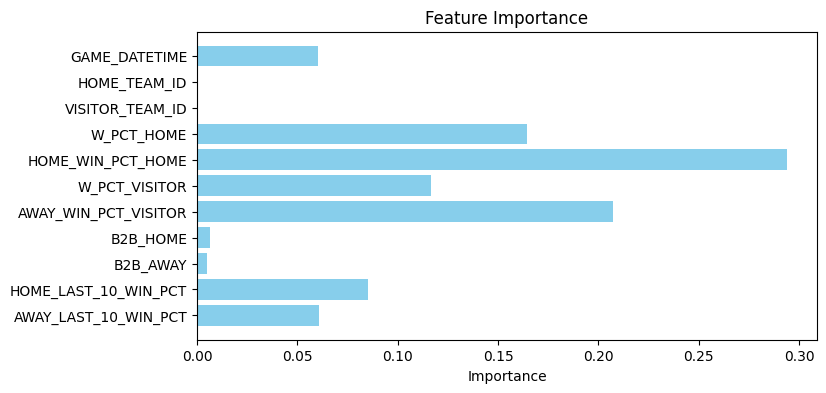

In [64]:
calculate_season(2023)

******* CALCULATING SEASON **********
2003
Train accuracy: 0.9545454545454546
Test accuracy: 0.7291440953412784


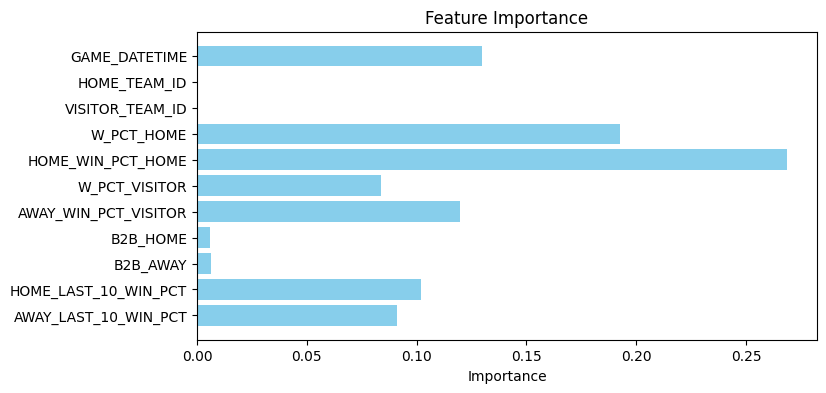

******* CALCULATING SEASON **********
2004
Train accuracy: 0.9273127753303965
Test accuracy: 0.7466960352422908


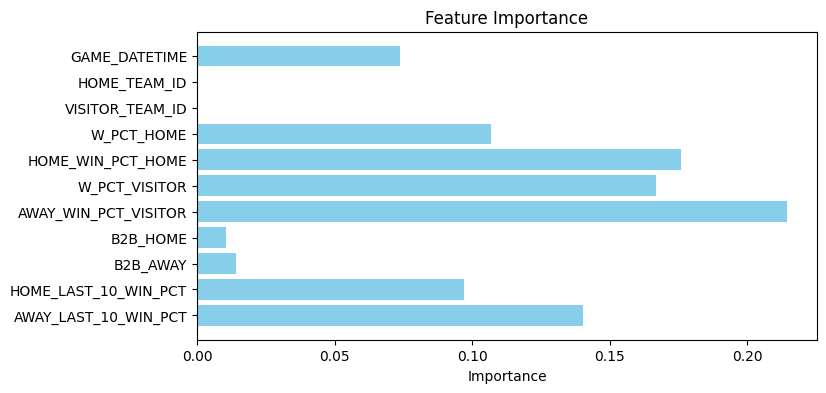

******* CALCULATING SEASON **********
2005
Train accuracy: 0.9435146443514645
Test accuracy: 0.7222222222222222


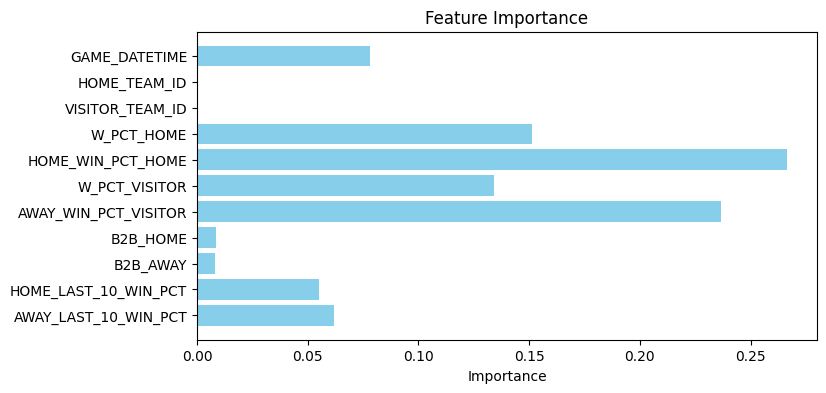

******* CALCULATING SEASON **********
2006
Train accuracy: 0.9408033826638478
Test accuracy: 0.7230443974630021


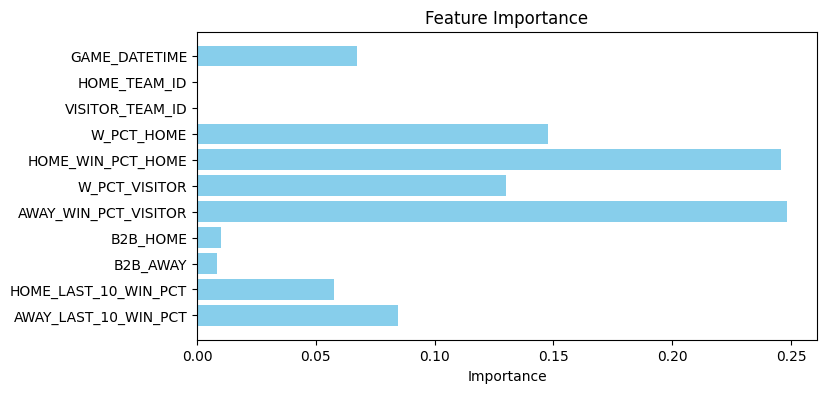

******* CALCULATING SEASON **********
2007
Train accuracy: 0.9384288747346072
Test accuracy: 0.7606382978723404


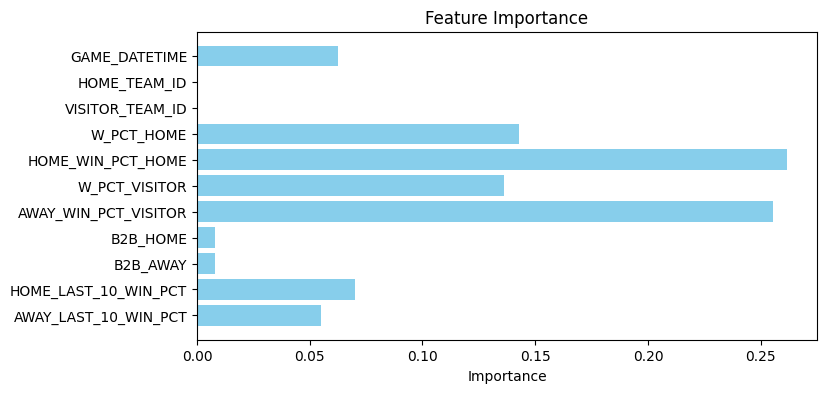

******* CALCULATING SEASON **********
2008
Train accuracy: 0.9621052631578947
Test accuracy: 0.7294736842105263


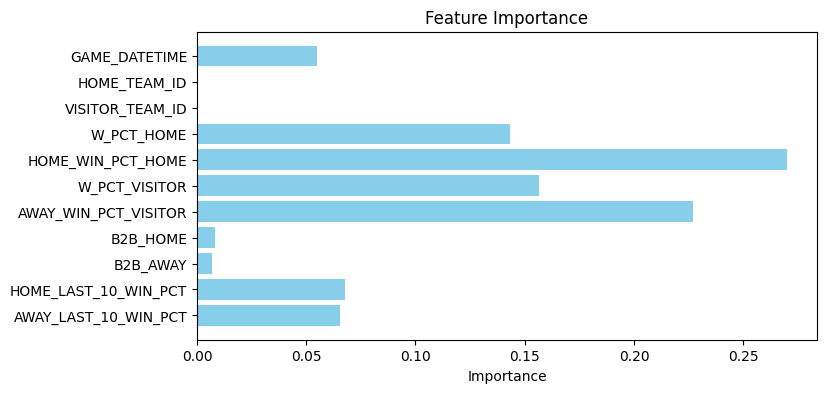

******* CALCULATING SEASON **********
2009
Train accuracy: 0.9473684210526315
Test accuracy: 0.7102212855637513


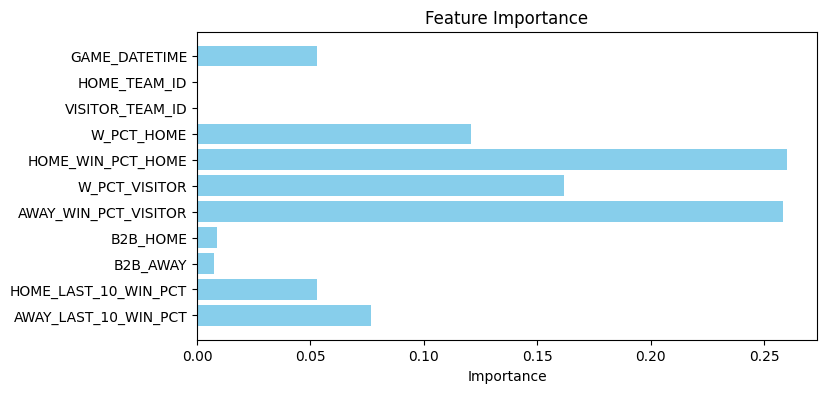

******* CALCULATING SEASON **********
2010
Train accuracy: 0.9493670886075949
Test accuracy: 0.7489451476793249


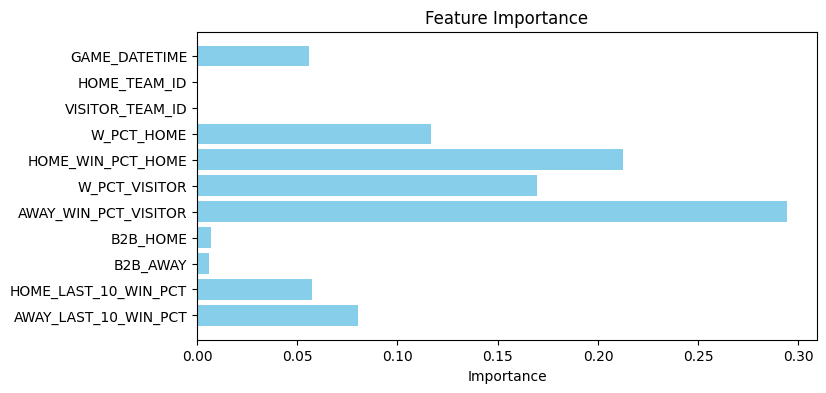

******* CALCULATING SEASON **********
2011
Train accuracy: 0.9619565217391305
Test accuracy: 0.6820652173913043


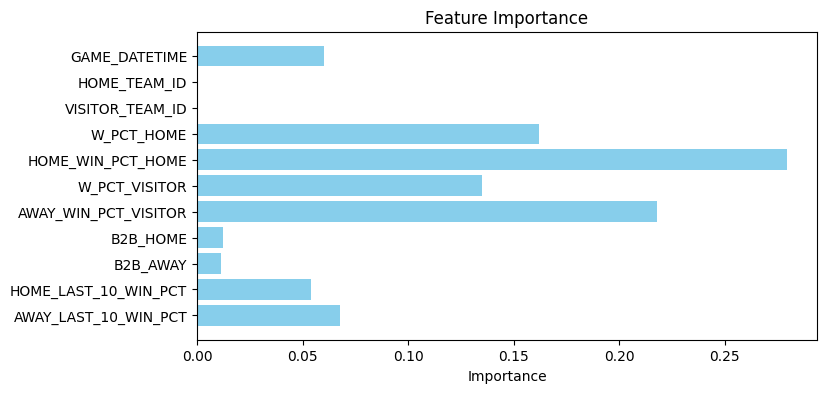

******* CALCULATING SEASON **********
2012
Train accuracy: 0.9535864978902954
Test accuracy: 0.7315010570824524


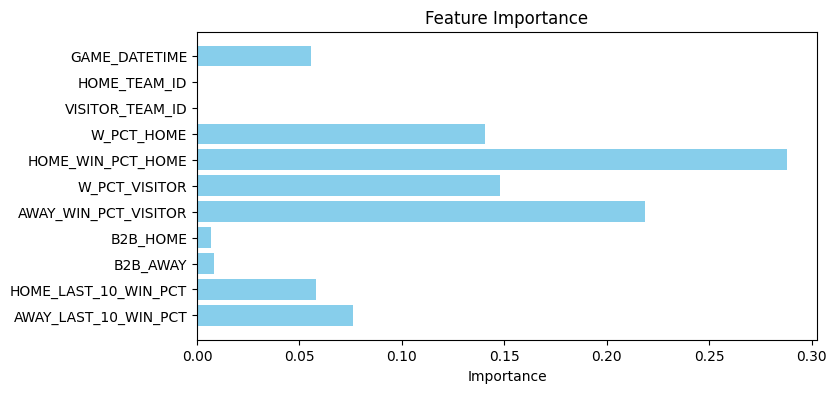

******* CALCULATING SEASON **********
2013
Train accuracy: 0.9558823529411765
Test accuracy: 0.704521556256572


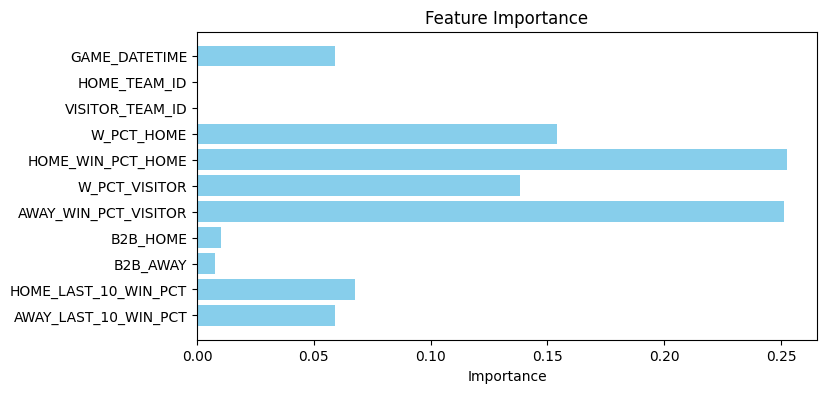

******* CALCULATING SEASON **********
2014
Train accuracy: 0.9534883720930233
Test accuracy: 0.7248677248677249


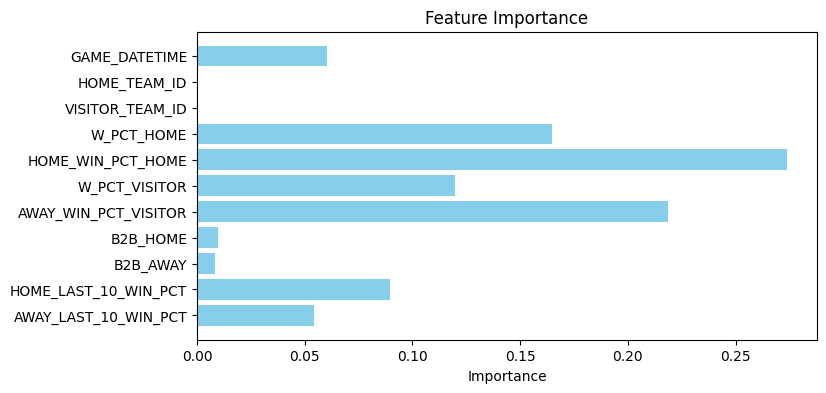

******* CALCULATING SEASON **********
2015
Train accuracy: 0.9364406779661016
Test accuracy: 0.7277542372881356


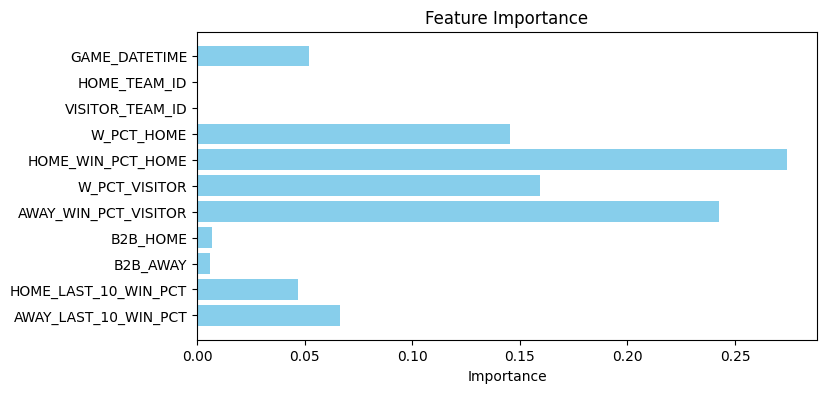

******* CALCULATING SEASON **********
2016
Train accuracy: 0.9253731343283582
Test accuracy: 0.6976495726495726


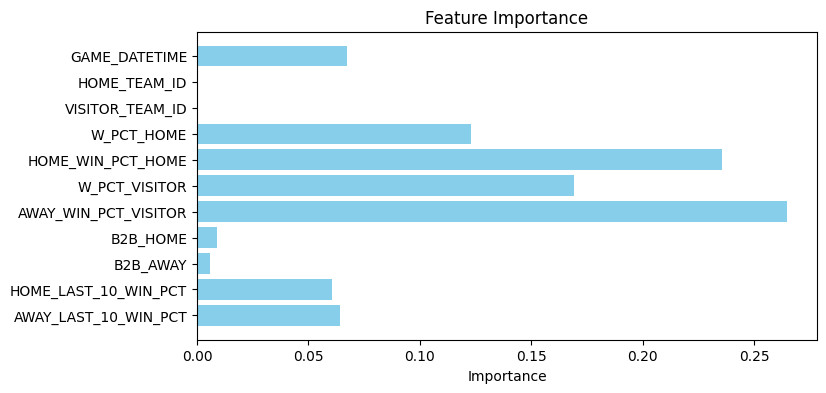

******* CALCULATING SEASON **********
2017
Train accuracy: 0.9587852494577006
Test accuracy: 0.7231270358306189


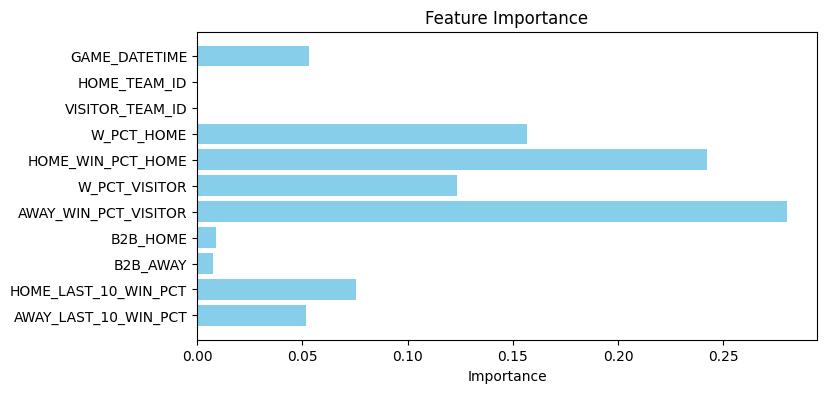

******* CALCULATING SEASON **********
2018
Train accuracy: 0.9695652173913043
Test accuracy: 0.7135076252723311


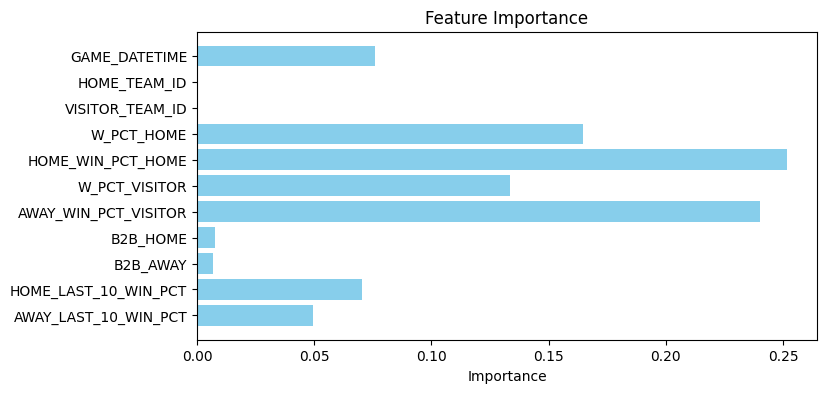

******* CALCULATING SEASON **********
2019
Train accuracy: 0.9758454106280193
Test accuracy: 0.694074969770254


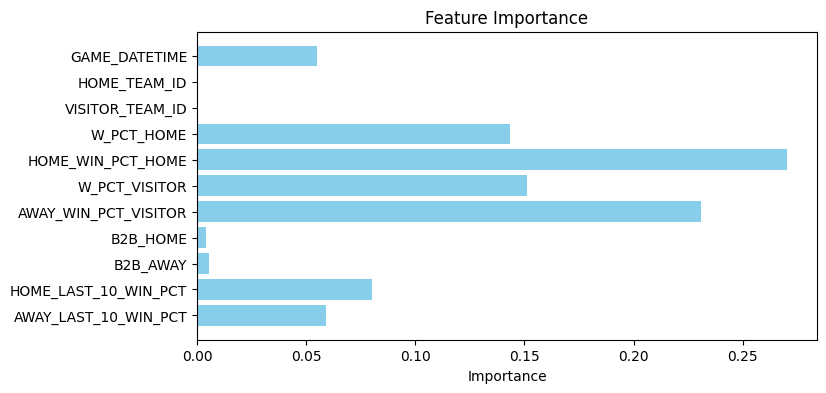

******* CALCULATING SEASON **********
2020
Train accuracy: 0.9361179361179361
Test accuracy: 0.7318573185731857


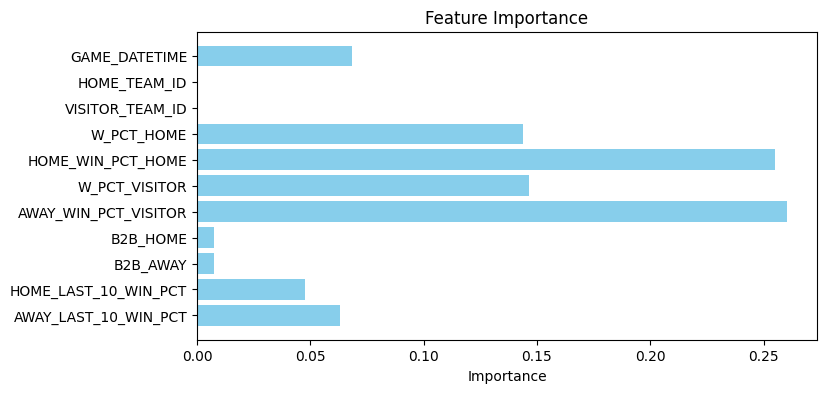

******* CALCULATING SEASON **********
2021
Train accuracy: 0.9416846652267818
Test accuracy: 0.6943844492440605


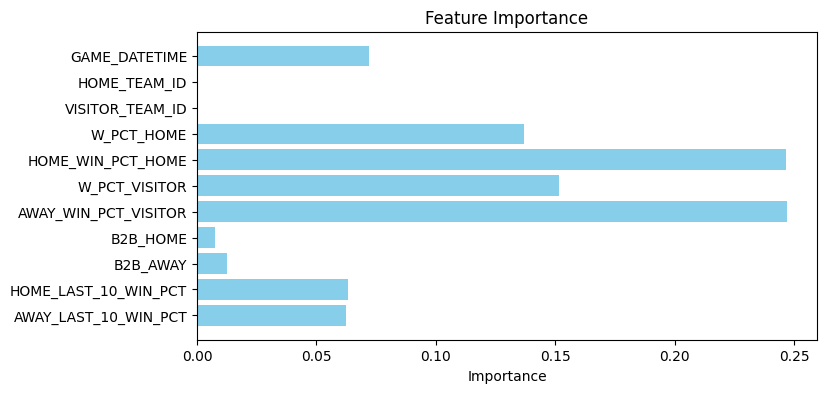

******* CALCULATING SEASON **********
2022
Train accuracy: 0.9199134199134199
Test accuracy: 0.6811279826464208


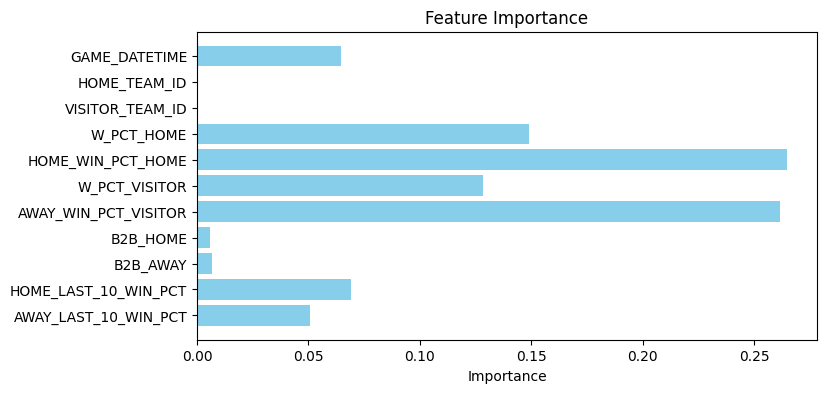

******* CALCULATING SEASON **********
2023
Train accuracy: 0.9522776572668112
Test accuracy: 0.7125813449023861


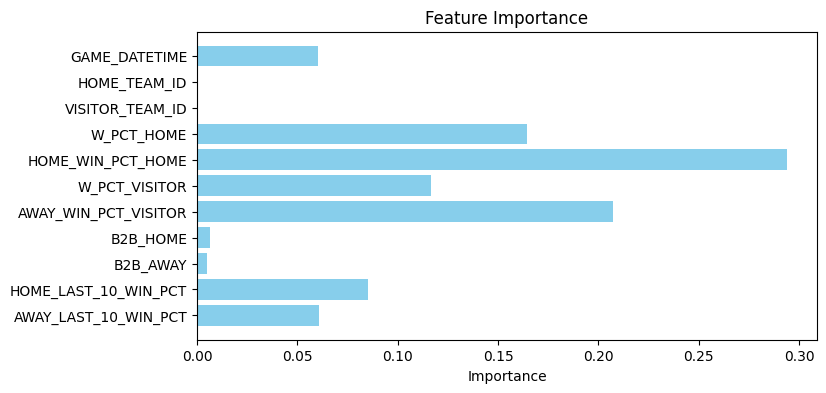

In [65]:
for i in range(2003, 2024):
    print("******* CALCULATING SEASON **********")
    print(i)
    calculate_season(i)

# Pulling odds data

Going to use [this](https://www.sportsbookreview.com/betting-odds/nba-basketball/) site, they seem to have historical odds from the major betting sites.

After pulling odds data, will try to match up with game data, seeing what a $10 bet will earn if we went with predictions (about a 70% success rate for predicting win/loss).

After that, there may be some way to determine confidence, and weigh bets to something with higher confidence (also will start to look at things like "favorite covers", "over/under", etc)

In [66]:
game_dates = games["GAME_DATE_EST"].unique()[::-1]

In [67]:
len(game_dates)

4714

## scrapy
Following cells use scrapy to pull odds data related to moneylines, spreads, and over/unders.

They will need processing to link them up with the games in the existing game data

In [79]:
import os

if not os.path.exists('data/odds_raw/moneyline.csv'):
  ! cd odds_collection && uv run scrapy crawl --loglevel INFO sports_book_moneyline

In [151]:
if not os.path.exists('data/odds_raw/spreads.csv'):
  ! cd odds_collection && uv run scrapy crawl --loglevel INFO sports_book_spread

In [83]:
if not os.path.exists('data/odds_raw/over_under.csv'):
  ! cd odds_collection && uv run scrapy crawl --loglevel INFO sports_book_over_under

## Processing
Go through odds data and link with games

In [104]:
moneylines = pd.read_csv('data/odds_raw/moneyline.csv')
moneylines.head()

,date,away,home,fanduel_away_odds,fanduel_home_odds,mgm_away_odds,mgm_home_odds,draftkings_away_odds,draftkings_home_odds,caesars_away_odds,caesars_home_odds
0,2024-11-15,Miami,Indiana,158.0,-188.0,150.0,-185.0,154.0,-185.0,158.0,-189.0
1,2024-11-15,Philadelphia,Orlando,118.0,-138.0,120.0,-145.0,120.0,-142.0,118.0,-141.0
2,2024-11-15,Detroit,Toronto,-146.0,124.0,-145.0,120.0,-142.0,120.0,-145.0,122.0
3,2024-11-15,L.A. Lakers,San Antonio,-142.0,118.0,-140.0,115.0,-135.0,114.0,-135.0,115.0
4,2024-11-15,Brooklyn,New York,270.0,-335.0,280.0,-350.0,295.0,-375.0,300.0,-385.0


In [105]:
teams = pd.read_csv('data/teams.csv')
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [106]:
def translate_city(city):
  if city.startswith("L.A."):
    nickname = city.split(" ")[1]
    team = teams[teams["NICKNAME"] == nickname]
    return team["TEAM_ID"].values[0]
  else:
    team = teams[teams["CITY"] == city]
    return team["TEAM_ID"].values[0]

moneylines["VISITOR_TEAM_ID"] = moneylines["away"].apply(translate_city)
moneylines["HOME_TEAM_ID"] = moneylines["home"].apply(translate_city)
moneylines.columns = [c.upper() for c in moneylines.columns]
moneylines = moneylines.drop(columns=["AWAY", "HOME"])
moneylines.head()

,DATE,FANDUEL_AWAY_ODDS,FANDUEL_HOME_ODDS,MGM_AWAY_ODDS,MGM_HOME_ODDS,DRAFTKINGS_AWAY_ODDS,DRAFTKINGS_HOME_ODDS,CAESARS_AWAY_ODDS,CAESARS_HOME_ODDS,VISITOR_TEAM_ID,HOME_TEAM_ID
0,2024-11-15,158.0,-188.0,150.0,-185.0,154.0,-185.0,158.0,-189.0,1610612748,1610612754
1,2024-11-15,118.0,-138.0,120.0,-145.0,120.0,-142.0,118.0,-141.0,1610612755,1610612753
2,2024-11-15,-146.0,124.0,-145.0,120.0,-142.0,120.0,-145.0,122.0,1610612765,1610612761
3,2024-11-15,-142.0,118.0,-140.0,115.0,-135.0,114.0,-135.0,115.0,1610612747,1610612759
4,2024-11-15,270.0,-335.0,280.0,-350.0,295.0,-375.0,300.0,-385.0,1610612751,1610612752


In [108]:
moneylines["VISITOR_TEAM_ID"].value_counts(dropna=False)

VISITOR_TEAM_ID
1610612738    257
1610612748    255
1610612743    250
1610612749    243
1610612742    242
1610612755    239
1610612747    238
1610612756    238
1610612763    235
1610612737    231
1610612750    231
1610612744    230
1610612754    229
1610612753    227
1610612762    227
1610612746    227
1610612740    225
1610612751    225
1610612761    224
1610612764    223
1610612758    223
1610612757    223
1610612752    221
1610612759    220
1610612739    220
1610612760    220
1610612745    220
1610612741    218
1610612765    216
1610612766    213
Name: count, dtype: int64

In [109]:
moneylines["HOME_TEAM_ID"].value_counts(dropna=False)

HOME_TEAM_ID
1610612738    259
1610612748    252
1610612747    250
1610612743    249
1610612746    244
1610612756    244
1610612749    244
1610612742    241
1610612755    235
1610612744    234
1610612752    230
1610612763    229
1610612737    228
1610612760    227
1610612751    227
1610612761    226
1610612745    224
1610612754    224
1610612739    223
1610612762    223
1610612741    221
1610612750    221
1610612757    220
1610612740    219
1610612759    218
1610612753    217
1610612758    217
1610612764    216
1610612766    214
1610612765    214
Name: count, dtype: int64

In [110]:
prepared_games_with_moneylines = prepared_games.merge(moneylines, left_on=["GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID"], right_on=["DATE", "HOME_TEAM_ID", "VISITOR_TEAM_ID"])
prepared_games_with_moneylines.tail()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS,GAME_DATETIME_OBJ,GAME_DATETIME,TEAM_ID_HOME,LEAGUE_ID_HOME,...,AWAY_LAST_10_WIN_PCT,DATE,FANDUEL_AWAY_ODDS,FANDUEL_HOME_ODDS,MGM_AWAY_ODDS,MGM_HOME_ODDS,DRAFTKINGS_AWAY_ODDS,DRAFTKINGS_HOME_ODDS,CAESARS_AWAY_ODDS,CAESARS_HOME_ODDS
6836,22400019,2024-11-15,1610612744,1610612763,2024,1,2024-11-15 00:00:00,1731628800000000000,1610612744,0,...,0.5,2024-11-15,235.0,-290.0,240.0,-300.0,240.0,-298.0,250.0,-323.0
6837,22400020,2024-11-15,1610612758,1610612750,2024,0,2024-11-15 00:00:00,1731628800000000000,1610612758,0,...,0.5,2024-11-15,-118.0,100.0,-125.0,105.0,-125.0,105.0,-115.0,-105.0
6838,22400011,2024-11-15,1610612761,1610612765,2024,0,2024-11-15 00:00:00,1731628800000000000,1610612761,0,...,0.6,2024-11-15,-146.0,124.0,-145.0,120.0,-142.0,120.0,-145.0,122.0
6839,22400017,2024-11-15,1610612740,1610612743,2024,1,2024-11-15 00:00:00,1731628800000000000,1610612740,0,...,0.7,2024-11-15,-126.0,108.0,-130.0,105.0,-125.0,105.0,-130.0,110.0
6840,22400009,2024-11-15,1610612754,1610612748,2024,0,2024-11-15 00:00:00,1731628800000000000,1610612754,0,...,0.5,2024-11-15,158.0,-188.0,150.0,-185.0,154.0,-185.0,158.0,-189.0


In [141]:
prepared_games_with_moneylines.to_csv('data/prepared_games_with_moneylines.csv', index=False)

## Evaluate outcomes
With odds data (going to rely on fanduel to start), see what monetary outcome would be if betting $10 on each model prediction

In [122]:
# def calculate_season_profitability(s):
#     season = prepared_games.loc[(prepared_games['SEASON'] == s)].sort_values(by="GAME_DATETIME")
#     train_1, test_1, test_2 = np.array_split(season, 3)
#     train = pd.concat([train_1])
#     X_train, y_train = train[feat_cols], train[target]

#     test = pd.concat([test_1, test_2])
#     X_test, y_test = test[feat_cols], test[target]
#     clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
#     clf.fit(X_train, y_train)
#     print('Train accuracy:',clf.score(X_train, y_train))
#     print('Test accuracy:', clf.score(X_test, y_test))

#     clf.predict(X_test)

season = prepared_games_with_moneylines.loc[(prepared_games_with_moneylines['SEASON'] == 2023)].sort_values(by="GAME_DATETIME")
train_1, test_1, test_2 = np.array_split(season, 3)
train = pd.concat([train_1])
X_train, y_train = train[feat_cols], train[target]

test = pd.concat([test_1, test_2])
X_test, y_test = test[feat_cols], test[target]
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

test["PREDICTION"] = clf.predict(X_test)

Train accuracy: 0.9522776572668112
Test accuracy: 0.7125813449023861


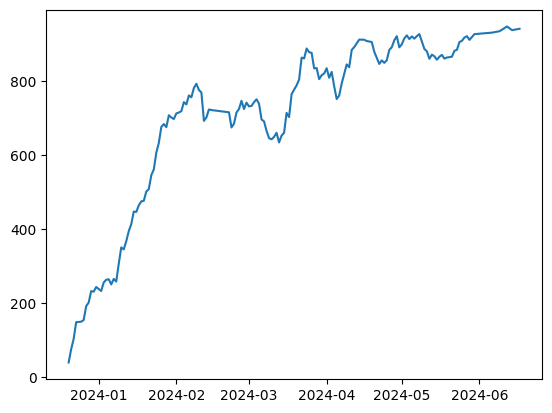

In [136]:
def apply_win_odds(row, wager=10.0):
  if row["PREDICTION"] == 1 and row["HOME_TEAM_WINS"] == 1: # Correct home predictions
    home_odds = row["FANDUEL_HOME_ODDS"] or row["BETMGM_HOME_ODDS"] or row["CAESARS_HOME_ODDS"] or row["DRAFKINGS_HOME_ODDS"]
    if home_odds is None:
      return 0
    if home_odds < 0:
      return wager * (100 / abs(home_odds))
    else:
      return wager * (home_odds / 100)
  elif row["PREDICTION"] == 0 and row["HOME_TEAM_WINS"] == 0: # Correct away predictions
    away_odds = row["FANDUEL_AWAY_ODDS"] or row["BETMGM_AWAY_ODDS"] or row["CAESARS_AWAY_ODDS"] or row["DRAFKINGS_AWAY_ODDS"]
    if away_odds is None:
      return 0
    if away_odds < 0:
      return wager * (100 / abs(away_odds))
    else:
      return wager * (away_odds / 100)
  else: # Incorrect predictions
    return -wager

test["PROFIT"] = test.apply(apply_win_odds, axis=1)
plt.plot(test["GAME_DATETIME_OBJ"].unique(), test.groupby("GAME_DATETIME_OBJ")["PROFIT"].sum().cumsum())


In [ ]:
test["G"]

In [127]:
test["PROFIT"].sum()


np.float64(940.7453667478842)

In [128]:
len(test)

922

In [129]:
940 / (922 * 10)

0.1019522776572668

In [139]:
def calculate_season_profitability(s):
  season = prepared_games_with_moneylines.loc[(prepared_games_with_moneylines['SEASON'] == s)].sort_values(by="GAME_DATETIME")
  train_1, test_1, test_2 = np.array_split(season, 3)
  train = pd.concat([train_1])
  X_train, y_train = train[feat_cols], train[target]

  test = pd.concat([test_1, test_2])
  X_test, y_test = test[feat_cols], test[target]
  clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
  clf.fit(X_train, y_train)
  print('Train accuracy:',clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))

  test["PREDICTION"] = clf.predict(X_test)
  test["PROFIT"] = test.apply(apply_win_odds, axis=1)
  profit = test["PROFIT"].sum()

  plt.plot(test["GAME_DATETIME_OBJ"].unique(), test.groupby("GAME_DATETIME_OBJ")["PROFIT"].sum().cumsum())
  plt.show()
  return (profit, len(test), profit / (len(test) * 10))

******* CALCULATING SEASON **********
2020
Train accuracy: 0.9361179361179361
Test accuracy: 0.7318573185731857


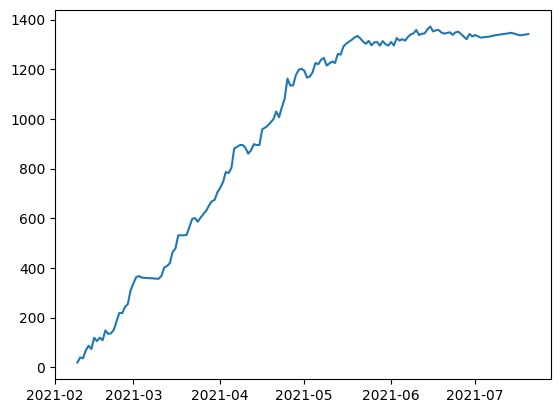

Profit: 1341.484564856934
Total Wagered: 8130
Profitability: 0.16500425151991807
******* CALCULATING SEASON **********
2021
Train accuracy: 0.9416846652267818
Test accuracy: 0.6943844492440605


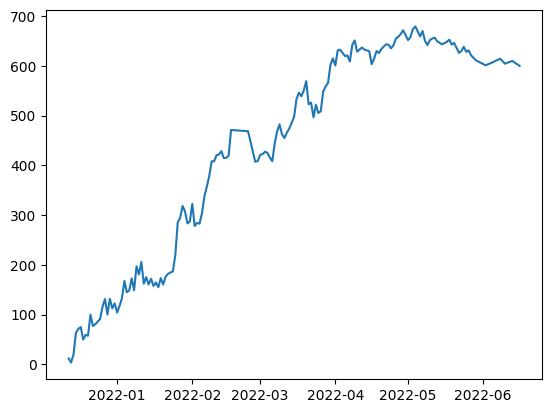

Profit: 599.8674301713493
Total Wagered: 9260
Profitability: 0.06478050001850424
******* CALCULATING SEASON **********
2022
Train accuracy: 0.9199134199134199
Test accuracy: 0.6811279826464208


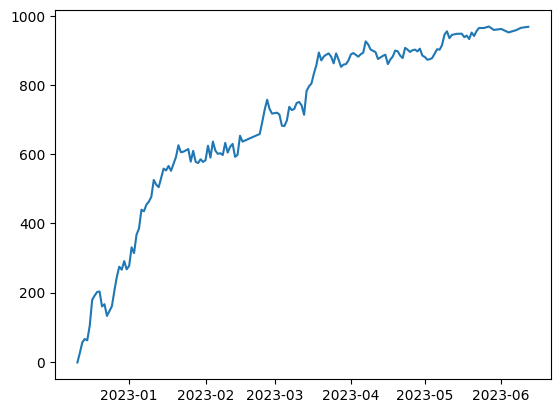

Profit: 967.993438298305
Total Wagered: 9220
Profitability: 0.10498844233170336
******* CALCULATING SEASON **********
2023
Train accuracy: 0.9522776572668112
Test accuracy: 0.7125813449023861


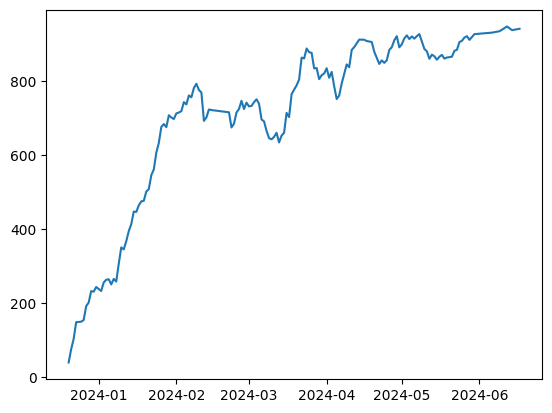

Profit: 940.7453667478842
Total Wagered: 9220
Profitability: 0.10203312003773148


In [140]:
for i in range(2020, 2024):
  print("******* CALCULATING SEASON **********")
  print(i)
  profit, total_wagers, profitability = calculate_season_profitability(i)
  print(f"Profit: {profit}")
  print(f"Total Wagered: {total_wagers * 10 }")
  print(f"Profitability: {profitability}")

# Results
With a pretty basic setup:

* Roughly 1/3 of the season complete
* The following features:
  * GAME_DATETIME
  * HOME_TEAM_ID
  * VISITOR_TEAM_ID
  * W_PCT_HOME
  * HOME_WIN_PCT_HOME
  * W_PCT_VISITOR
  * AWAY_WIN_PCT_VISITOR
  * B2B_HOME
  * B2B_AWAY
  * HOME_LAST_10_WIN_PCT
  * AWAY_LAST_10_WIN_PCT

Can run a RandomForestClassifier that will predict *roughly* 70% of the results.

Combining those results with the money line odds for the remaining games (2/3 the season), with a $10 wager per game, can (maybe????) predict a profit in the 10% range.

## Next steps
* Build similar model against the spread - this will hopefully yield higher profit (although more difficult to predict than moneyline)
* Improve the model
  * Maybe this could be improved by building the model every day and only looking at last 10 games or something like that? Bias for recent performance.
    * Note how the bar charts start steep and flatten out! If we considered more recent performance, this may perform better later in the season (teams tanking, contending for playoffs, etc). HOWEVER! The last two months of each chart are the playoffs. Much trickier to predict, so may want to exclude those games altogether.
  * Instead of 0/1, maybe get a confidence score and bet more aggressively on games that the model is more confident in
* Daily pipeline and store results
  * Build a daily worker that uses the model against current game data to accumulate and track results

# Spread Model

In [152]:
spreads = pd.read_csv('data/odds_raw/spreads.csv')
spreads.head()

,date,away,home,fanduel_away_spread,fanduel_away_odds,fanduel_home_spread,fanduel_home_odds,mgm_away_spread,mgm_away_odds,mgm_home_spread,mgm_home_odds,draftkings_away_spread,draftkings_away_odds,draftkings_home_spread,draftkings_home_odds,caesars_away_spread,caesars_away_odds,caesars_home_spread,caesars_home_odds
0,2024-11-15,Miami,Indiana,4.5,-112.0,-4.5,-108.0,4.5,-110.0,-4.5,-110.0,4.5,-108.0,-4.5,-112.0,4.5,-105.0,-4.5,-115.0
1,2024-11-15,Philadelphia,Orlando,2.5,-110.0,-2.5,-110.0,2.5,-105.0,-2.5,-115.0,2.5,-108.0,-2.5,-112.0,2.5,-110.0,-2.5,-110.0
2,2024-11-15,Detroit,Toronto,-2.5,-112.0,2.5,-108.0,-2.5,-115.0,2.5,-105.0,-2.5,-118.0,2.5,-102.0,-2.5,-110.0,2.5,-110.0
3,2024-11-15,L.A. Lakers,San Antonio,-2.5,-112.0,2.5,-108.0,-2.5,-110.0,2.5,-110.0,-2.5,-108.0,2.5,-112.0,-2.5,-115.0,2.5,-105.0
4,2024-11-15,Brooklyn,New York,8.5,-110.0,-8.5,-110.0,8.5,-110.0,-8.5,-110.0,8.5,-108.0,-8.5,-112.0,9.0,-110.0,-9.0,-110.0


In [153]:
def translate_city(city):
  if city.startswith("L.A."):
    nickname = city.split(" ")[1]
    team = teams[teams["NICKNAME"] == nickname]
    return team["TEAM_ID"].values[0]
  else:
    team = teams[teams["CITY"] == city]
    return team["TEAM_ID"].values[0]

spreads["VISITOR_TEAM_ID"] = spreads["away"].apply(translate_city)
spreads["HOME_TEAM_ID"] = spreads["home"].apply(translate_city)
spreads.columns = [c.upper() for c in spreads.columns]
spreads = spreads.drop(columns=["AWAY", "HOME"])
spreads.head()

,DATE,FANDUEL_AWAY_SPREAD,FANDUEL_AWAY_ODDS,FANDUEL_HOME_SPREAD,FANDUEL_HOME_ODDS,MGM_AWAY_SPREAD,MGM_AWAY_ODDS,MGM_HOME_SPREAD,MGM_HOME_ODDS,DRAFTKINGS_AWAY_SPREAD,DRAFTKINGS_AWAY_ODDS,DRAFTKINGS_HOME_SPREAD,DRAFTKINGS_HOME_ODDS,CAESARS_AWAY_SPREAD,CAESARS_AWAY_ODDS,CAESARS_HOME_SPREAD,CAESARS_HOME_ODDS,VISITOR_TEAM_ID,HOME_TEAM_ID
0,2024-11-15,4.5,-112.0,-4.5,-108.0,4.5,-110.0,-4.5,-110.0,4.5,-108.0,-4.5,-112.0,4.5,-105.0,-4.5,-115.0,1610612748,1610612754
1,2024-11-15,2.5,-110.0,-2.5,-110.0,2.5,-105.0,-2.5,-115.0,2.5,-108.0,-2.5,-112.0,2.5,-110.0,-2.5,-110.0,1610612755,1610612753
2,2024-11-15,-2.5,-112.0,2.5,-108.0,-2.5,-115.0,2.5,-105.0,-2.5,-118.0,2.5,-102.0,-2.5,-110.0,2.5,-110.0,1610612765,1610612761
3,2024-11-15,-2.5,-112.0,2.5,-108.0,-2.5,-110.0,2.5,-110.0,-2.5,-108.0,2.5,-112.0,-2.5,-115.0,2.5,-105.0,1610612747,1610612759
4,2024-11-15,8.5,-110.0,-8.5,-110.0,8.5,-110.0,-8.5,-110.0,8.5,-108.0,-8.5,-112.0,9.0,-110.0,-9.0,-110.0,1610612751,1610612752


In [198]:
games_with_spreads = games.merge(spreads, left_on=["GAME_DATE_EST", "HOME_TEAM_ID", "VISITOR_TEAM_ID"], right_on=["DATE", "HOME_TEAM_ID", "VISITOR_TEAM_ID"])
games_with_spreads.columns = [c.upper() for c in games_with_spreads.columns]
games_with_spreads.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_HOME,PTS_HOME,FG_PCT_HOME,FT_PCT_HOME,...,MGM_HOME_SPREAD,MGM_HOME_ODDS,DRAFTKINGS_AWAY_SPREAD,DRAFTKINGS_AWAY_ODDS,DRAFTKINGS_HOME_SPREAD,DRAFTKINGS_HOME_ODDS,CAESARS_AWAY_SPREAD,CAESARS_AWAY_ODDS,CAESARS_HOME_SPREAD,CAESARS_HOME_ODDS
0,2019-10-04,11900002,Final,1610612746,1610612745,2019,1610612746,96.0,0.384,0.600,...,NaN,NaN,-12.5,-120.0,12.5,-112.0,NaN,NaN,NaN,NaN
1,2019-10-04,11900003,Final,1610612758,1610612754,2019,1610612758,131.0,0.494,0.778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-05,11900007,Final,1610612759,1610612753,2019,1610612759,89.0,0.388,0.750,...,NaN,NaN,-31.5,-115.0,31.5,-117.0,NaN,NaN,NaN,NaN
3,2019-10-05,11900006,Final,1610612744,1610612747,2019,1610612744,101.0,0.393,0.769,...,NaN,NaN,-23.0,-110.0,23.0,-121.0,NaN,NaN,NaN,NaN
4,2019-10-05,11900005,Final,1610612754,1610612758,2019,1610612754,130.0,0.521,0.944,...,NaN,NaN,5.0,-110.0,-5.0,-112.0,NaN,NaN,NaN,NaN


In [221]:
def calc_b2b(team_id, games):
    _game = games[(games['HOME_TEAM_ID'] == team_id) | (games['VISITOR_TEAM_ID'] == team_id)]


    _game[["PREV_GAME_DATETIME_OBJ", "PREV_GAME_HOME_TEAM_ID"]] = _game[["GAME_DATETIME_OBJ", "HOME_TEAM_ID"]].shift(1)
    _game.loc[:,'B2B'] = (_game["PREV_GAME_DATETIME_OBJ"] == _game["GAME_DATETIME_OBJ"] - pd.Timedelta(days=1)) & (_game["PREV_GAME_HOME_TEAM_ID"] != _game["HOME_TEAM_ID"]) # is B2B and traveled
    return _game[["GAME_ID", "B2B"]]

def calculate_favorite_team_id(row):
  home_spread = row["FANDUEL_HOME_SPREAD"] or row["BETMGM_HOME_SPREAD"] or row["CAESARS_HOME_SPREAD"] or row["DRAFKINGS_HOME_SPREAD"]
  if not home_spread:
    return row
  if home_spread <=0:
    row["FAVORITE_TEAM_ID"] = row["HOME_TEAM_ID"]
    row["FAVORITE_TEAM_ODDS"] = row["FANDUEL_HOME_ODDS"] or row["BETMGM_HOME_ODDS"] or row["CAESARS_HOME_ODDS"] or row["DRAFKINGS_HOME_ODDS"]
    row["UNDERDOG_TEAM_ODDS"] = row["FANDUEL_AWAY_ODDS"] or row["BETMGM_AWAY_ODDS"] or row["CAESARS_AWAY_ODDS"] or row["DRAFKINGS_AWAY_ODDS"]
    row["FAVORITE_SPREAD"] = home_spread
  else:
    row["FAVORITE_TEAM_ID"] = row["VISITOR_TEAM_ID"]
    row["FAVORITE_TEAM_ODDS"] = row["FANDUEL_AWAY_ODDS"] or row["BETMGM_AWAY_ODDS"] or row["CAESARS_AWAY_ODDS"] or row["DRAFKINGS_AWAY_ODDS"]
    row["UNDERDOG_TEAM_ODDS"] = row["FANDUEL_HOME_ODDS"] or row["BETMGM_HOME_ODDS"] or row["CAESARS_HOME_ODDS"] or row["DRAFKINGS_HOME_ODDS"]
    row["FAVORITE_SPREAD"] = -home_spread

  if row["FAVORITE_TEAM_ID"] == row["HOME_TEAM_ID"] and row["PTS_HOME"] - row["PTS_AWAY"] > abs(row["FAVORITE_SPREAD"]):
    row["SPREAD_COVERED_BY_FAVORITE"] = 1
  elif row["FAVORITE_TEAM_ID"] == row["VISITOR_TEAM_ID"] and row["PTS_AWAY"] - row["PTS_HOME"] > abs(row["FAVORITE_SPREAD"]):
    row["SPREAD_COVERED_BY_FAVORITE"] = 1
  else:
    row["SPREAD_COVERED_BY_FAVORITE"] = 0
  return row

def enrich_game_data(_games):
    model_data = _games.drop(columns=["TEAM_ID_HOME", "TEAM_ID_AWAY"])

    model_data["GAME_DATETIME_OBJ"] = pd.to_datetime(_games["GAME_DATE_EST"])
    model_data["GAME_DATETIME"] = model_data["GAME_DATETIME_OBJ"].astype(int)
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "HOME_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"])
    model_data = model_data.merge(ranking, left_on=["GAME_DATE_EST", "VISITOR_TEAM_ID"], right_on=["STANDINGSDATE", "TEAM_ID"], suffixes=("_HOME", "_VISITOR"))

    home_b2bs = pd.concat([calc_b2b(team_id, model_data) for team_id in model_data["HOME_TEAM_ID"].unique()])
    model_data = model_data.merge(home_b2bs, on="GAME_ID")

    away_b2bs = pd.concat([calc_b2b(team_id, model_data) for team_id in model_data["VISITOR_TEAM_ID"].unique()])
    model_data = model_data.merge(away_b2bs, on="GAME_ID", suffixes=("_HOME", "_AWAY"))

    model_data = model_data.apply(calculate_favorite_team_id, axis=1)

    model_data = model_data.drop_duplicates(subset=["GAME_ID"])
    return model_data

def prepare_games(games):
    _games = enrich_game_data(games.copy().sort_values(by="GAME_DATE_EST"))


    def calc_game_lookback_data(game):
        home_team_id = game['HOME_TEAM_ID']
        home_last_10_win_pct = calc_last_n_cover_pct(home_team_id, 10)
        home_last_10_win_pct = home_last_10_win_pct[home_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        home_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        home_lookback_data = pd.concat([home_last_10_win_pct], axis=1).add_prefix('HOME_')

        away_team_id = game['VISITOR_TEAM_ID']
        away_last_10_win_pct = calc_last_n_cover_pct(away_team_id, 10)
        away_last_10_win_pct = away_last_10_win_pct[away_last_10_win_pct["GAME_ID"] == game["GAME_ID"]]
        away_last_10_win_pct.drop(columns="GAME_ID", inplace=True)
        away_lookback_data = pd.concat([away_last_10_win_pct], axis=1).add_prefix('AWAY_')

        lookback_data = pd.concat([game.to_frame().T, home_lookback_data, away_lookback_data], axis=1)
        lookback_data["HOME_TEAM_WINS"] = lookback_data["HOME_TEAM_WINS"].astype(int)
        lookback_data["SPREAD_COVERED_BY_FAVORITE"] = lookback_data["SPREAD_COVERED_BY_FAVORITE"].astype(int)
        return lookback_data



    def calc_last_n_cover_pct(team_id, n):
        _game = _games[(_games['HOME_TEAM_ID'] == team_id) | (_games['VISITOR_TEAM_ID'] == team_id)]
        _game.loc[:,'IS_FAVORITE'] = _game['FAVORITE_TEAM_ID'] == team_id
        _game.loc[:,'COVER_PRCT'] = (_game['IS_FAVORITE'] & _game['SPREAD_COVERED_BY_FAVORITE']) | (~_game['IS_FAVORITE'] & ~_game['SPREAD_COVERED_BY_FAVORITE'])
        rolling_win_pct = _game["COVER_PRCT"].rolling(n, min_periods=1).mean().rename(f"LAST_{n}_COVER_PCT")
        return pd.concat([_game["GAME_ID"], rolling_win_pct], axis=1)

    return pd.concat(_games.apply(calc_game_lookback_data, axis=1).tolist())

prepared_games_with_spreads = prepare_games(games_with_spreads)

In [222]:
prepared_games_with_spreads.tail()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_HOME,FG_PCT_HOME,FT_PCT_HOME,FG3_PCT_HOME,...,AWAY_WIN_PCT_VISITOR,B2B_HOME,B2B_AWAY,FAVORITE_TEAM_ID,FAVORITE_TEAM_ODDS,UNDERDOG_TEAM_ODDS,FAVORITE_SPREAD,SPREAD_COVERED_BY_FAVORITE,HOME_LAST_10_COVER_PCT,AWAY_LAST_10_COVER_PCT
73952,2024-11-15,22400019,Final,1610612744,1610612763,2024,123.0,0.439,0.72,0.413,...,0.428571,False,False,1610612744,-114.0,-106.0,-7.0,0,0.7,0.7
73960,2024-11-15,22400020,Final,1610612758,1610612750,2024,126.0,0.5,0.9,0.324,...,0.428571,False,False,1610612750,-108.0,-112.0,-1.5,1,0.6,0.4
73968,2024-11-15,22400011,Final,1610612761,1610612765,2024,95.0,0.361,0.773,0.258,...,0.428571,False,False,1610612765,-112.0,-108.0,-2.5,1,0.6,0.7
73976,2024-11-15,22400017,Final,1610612740,1610612743,2024,101.0,0.425,0.889,0.314,...,0.5,False,False,1610612743,-108.0,-112.0,-2.0,0,0.2,0.4
73984,2024-11-15,22400009,Final,1610612754,1610612748,2024,111.0,0.512,0.818,0.4,...,0.5,False,False,1610612754,-108.0,-112.0,-4.5,0,0.5,0.5


In [223]:
len(prepared_games_with_spreads)
prepared_games_with_spreads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6834 entries, 0 to 73984
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_DATE_EST               6834 non-null   object 
 1   GAME_ID                     6834 non-null   object 
 2   GAME_STATUS_TEXT            6834 non-null   object 
 3   HOME_TEAM_ID                6834 non-null   object 
 4   VISITOR_TEAM_ID             6834 non-null   object 
 5   SEASON                      6834 non-null   object 
 6   PTS_HOME                    6834 non-null   object 
 7   FG_PCT_HOME                 6834 non-null   object 
 8   FT_PCT_HOME                 6834 non-null   object 
 9   FG3_PCT_HOME                6834 non-null   object 
 10  AST_HOME                    6834 non-null   object 
 11  REB_HOME                    6834 non-null   object 
 12  PTS_AWAY                    6834 non-null   object 
 13  FG_PCT_AWAY                 6834 non-

In [224]:
prepared_games_with_spreads["AWAY_LAST_10_COVER_PCT"].value_counts()

AWAY_LAST_10_COVER_PCT
0.500000    1749
0.400000    1416
0.600000    1402
0.700000     787
0.300000     773
0.800000     261
0.200000     223
0.100000      60
0.900000      58
0.000000      36
0.666667      15
0.428571      10
1.000000      10
0.444444       6
0.333333       6
0.250000       4
0.375000       3
0.555556       3
0.571429       3
0.714286       2
0.625000       2
0.166667       1
0.750000       1
0.833333       1
0.875000       1
0.222222       1
Name: count, dtype: int64

In [225]:
doesnt_cover = prepared_games_with_spreads["SPREAD_COVERED_BY_FAVORITE"].value_counts()[0]
covers = prepared_games_with_spreads["SPREAD_COVERED_BY_FAVORITE"].value_counts()[1]

covers / (covers + doesnt_cover)

np.float64(0.4847819724904887)

## Spread distribution
Note that the favorite covering the spread happens close to 50% of the time. May be more difficult to predict

In [226]:
feat_cols = [
    "GAME_DATETIME",
    "HOME_TEAM_ID",
    "VISITOR_TEAM_ID",
    "W_PCT_HOME",
    "HOME_WIN_PCT_HOME",
    "W_PCT_VISITOR",
    "AWAY_WIN_PCT_VISITOR",
    "B2B_HOME",
    "B2B_AWAY",
    "HOME_LAST_10_COVER_PCT",
    "AWAY_LAST_10_COVER_PCT"
]
target = 'SPREAD_COVERED_BY_FAVORITE'

In [227]:
season = prepared_games_with_spreads.loc[(prepared_games_with_spreads['SEASON'] == 2023)].sort_values(by="GAME_DATETIME")
splits = np.array_split(season, 4)
train = pd.concat(splits[0:2])
X_train, y_train = train[feat_cols], train[target]

test = pd.concat(splits[2:4])
X_test, y_test = test[feat_cols], test[target]
clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
clf.fit(X_train, y_train)
print('Train accuracy:',clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

test["PREDICTION"] = clf.predict(X_test)

Train accuracy: 0.9055232558139535
Test accuracy: 0.5537790697674418


More analysis probably needed here - the training splits required to get this above 50% was very finnicky

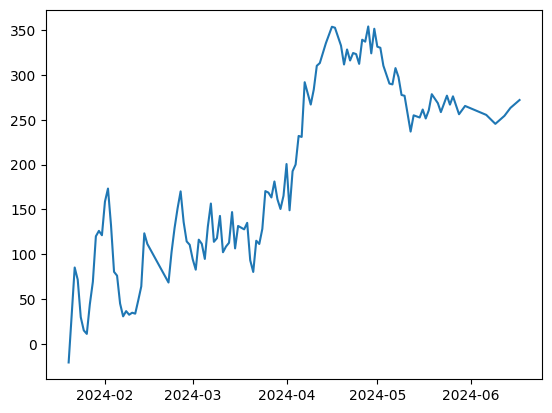

In [228]:
def apply_win_odds(row, wager=10.0):
  if row["PREDICTION"] == 1 and row["SPREAD_COVERED_BY_FAVORITE"] == 1: # Correct favorite cover prediction
    odds = row["FAVORITE_TEAM_ODDS"]
    if odds is None:
      return 0
    if odds < 0:
      return wager * (100 / abs(odds))
    else:
      return wager * (odds / 100)
  elif row["PREDICTION"] == 0 and row["SPREAD_COVERED_BY_FAVORITE"] == 0: # Correct underdog cover prediction
    odds = row["UNDERDOG_TEAM_ODDS"]
    if odds is None:
      return 0
    if odds < 0:
      return wager * (100 / abs(odds))
    else:
      return wager * (odds / 100)
  else: # Incorrect predictions
    return -wager

test["PROFIT"] = test.apply(apply_win_odds, axis=1)
plt.plot(test["GAME_DATETIME_OBJ"].unique(), test.groupby("GAME_DATETIME_OBJ")["PROFIT"].sum().cumsum())

******* CALCULATING SEASON **********
2020
Train accuracy: 0.8573770491803279
Test accuracy: 0.5393442622950819


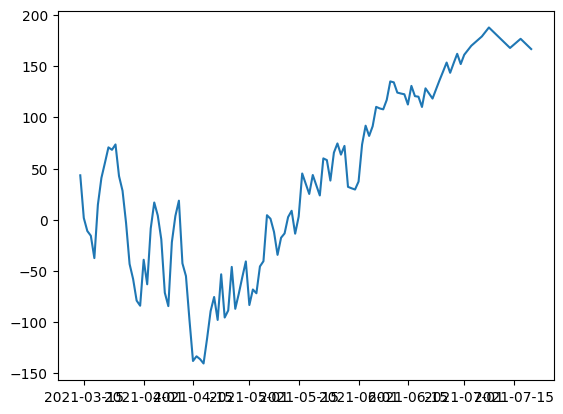

Profit: 166.663588503276
Total Wagered: 6100
Profitability: 0.02732189975463541
******* CALCULATING SEASON **********
2021
Train accuracy: 0.8776978417266187
Test accuracy: 0.5345821325648416


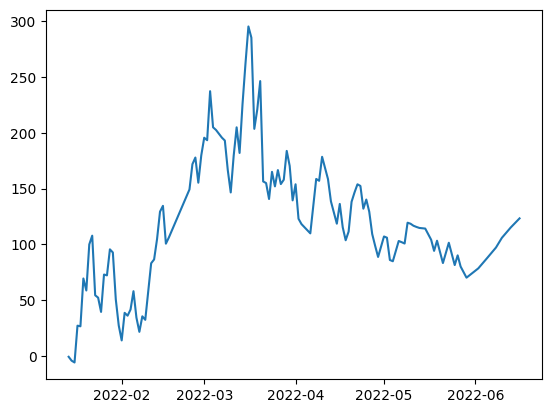

Profit: 123.23234780560719
Total Wagered: 6940
Profitability: 0.017756822450375676
******* CALCULATING SEASON **********
2022
Train accuracy: 0.8641618497109826
Test accuracy: 0.5621387283236994


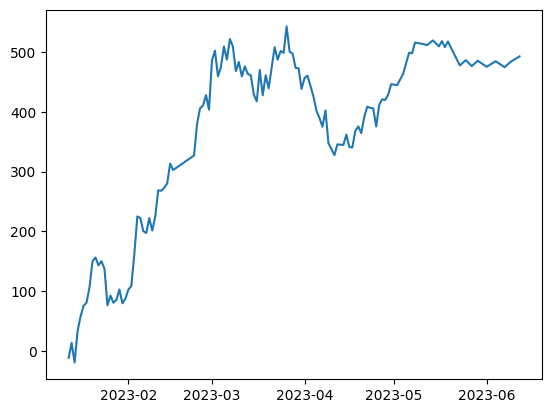

Profit: 492.4946640078679
Total Wagered: 6920
Profitability: 0.07116974913408496
******* CALCULATING SEASON **********
2023
Train accuracy: 0.9055232558139535
Test accuracy: 0.5537790697674418


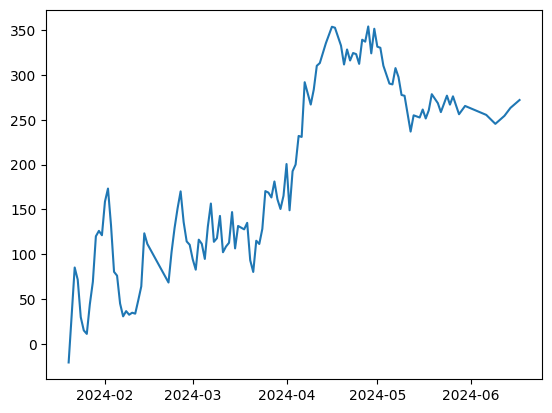

Profit: 272.1999376801012
Total Wagered: 6880
Profitability: 0.039563944430247265


In [229]:
def calculate_season_profitability(s):
  season = prepared_games_with_spreads.loc[(prepared_games_with_spreads['SEASON'] == s)].sort_values(by="GAME_DATETIME")
  splits = np.array_split(season, 4)
  train = pd.concat(splits[0:2])
  X_train, y_train = train[feat_cols], train[target]

  test = pd.concat(splits[2:4])
  X_test, y_test = test[feat_cols], test[target]
  clf = RandomForestClassifier(random_state=42, n_jobs=2, n_estimators=1000, max_depth=7, bootstrap=True)
  clf.fit(X_train, y_train)
  print('Train accuracy:',clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))

  test["PREDICTION"] = clf.predict(X_test)
  test["PREDICTION"] = clf.predict(X_test)
  test["PROFIT"] = test.apply(apply_win_odds, axis=1)
  profit = test["PROFIT"].sum()

  plt.plot(test["GAME_DATETIME_OBJ"].unique(), test.groupby("GAME_DATETIME_OBJ")["PROFIT"].sum().cumsum())
  plt.show()
  return (profit, len(test), profit / (len(test) * 10))

for i in range(2020, 2024):
  print("******* CALCULATING SEASON **********")
  print(i)
  profit, total_wagers, profitability = calculate_season_profitability(i)
  print(f"Profit: {profit}")
  print(f"Total Wagered: {total_wagers * 10 }")
  print(f"Profitability: {profitability}")

## Spread model
Likely needs different feature data to predict more accurately - payouts are higher, but likelihood of correct selection is lower. Maybe spreads are more likely to be covered in playoffs (especially early rounds)?